In [247]:
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy import stats
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [248]:
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [249]:
pd.set_option("display.max_columns", None)

In [250]:
data=pd.read_csv("C:/Users/user/Desktop/Loan Data project/SBA.csv")
data.head(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,120,19,1.0,0,0,1,0,N,N,NaN,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,45,45,2.0,0,0,0,0,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,84,1,2.0,0,0,1,0,N,Y,NaN,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,297,2,2.0,0,0,1,0,N,N,NaN,31-Jul-97,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,84,3,2.0,0,0,1,0,N,Y,NaN,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


## Cleaning

Hədəf sütunda balansızlıq(imbalance) var ya yox

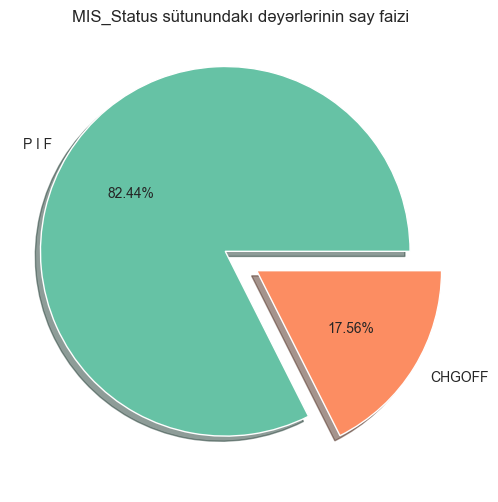

In [251]:
status_say = data["MIS_Status"].value_counts()

colorss = sns.color_palette('Set2')

sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
plt.pie(status_say, 
        labels=status_say.index, 
        autopct='%.2f%%', 
        colors=colorss, 
        explode=[0.1]*len(status_say),
        shadow=True,
        wedgeprops=dict(edgecolor='w', linewidth=1))
plt.title('MIS_Status sütunundakı dəyərlərinin say faizi')
plt.show()

In [252]:
print(data.info())

data.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"


In [253]:
data[["DisbursementGross$","Disbursementgross"]]=data['DisbursementGross'].str.split("$", n=1, expand=True)
data[['Bg$','Balancegross']]=data['BalanceGross'].str.split("$", n=1, expand=True)
data[['Chg$','Chgoffpringr']]=data['ChgOffPrinGr'].str.split("$", n=1, expand=True)
data[["GrAppv$","Grappv"]]=data['GrAppv'].str.split("$", n=1, expand=True)
data[['SBA_Appv$','SBA_appv']]=data['SBA_Appv'].str.split("$", n=1, expand=True)

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 37 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   LoanNr_ChkDgt       899164 non-null  int64  
 1   Name                899150 non-null  object 
 2   City                899134 non-null  object 
 3   State               899150 non-null  object 
 4   Zip                 899164 non-null  int64  
 5   Bank                897605 non-null  object 
 6   BankState           897598 non-null  object 
 7   NAICS               899164 non-null  int64  
 8   ApprovalDate        899164 non-null  object 
 9   ApprovalFY          899164 non-null  object 
 10  Term                899164 non-null  int64  
 11  NoEmp               899164 non-null  int64  
 12  NewExist            899028 non-null  float64
 13  CreateJob           899164 non-null  int64  
 14  RetainedJob         899164 non-null  int64  
 15  FranchiseCode       899164 non-nul

In [255]:
data['Disbursementgross']=data['Disbursementgross'].str.replace(',','').astype(float).astype(int)
data['Balancegross']=data['Balancegross'].str.replace(',','').astype(float).astype(int)
data['Chgoffpringr']=data['Chgoffpringr'].str.replace(',','').astype(float).astype(int)
data['Grappv']=data['Grappv'].str.replace(',','').astype(float).astype(int)
data['SBA_appv']=data['SBA_appv'].str.replace(',','').astype(float).astype(int)

In [256]:
data.head(4)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DisbursementGross$,Disbursementgross,Bg$,Balancegross,Chg$,Chgoffpringr,GrAppv$,Grappv,SBA_Appv$,SBA_appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",,60000,,0,,0,,60000,,48000
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",,40000,,0,,0,,40000,,32000
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",,287000,,0,,0,,287000,,215250
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00",,35000,,0,,0,,35000,,28000


In [257]:
data.drop(['DisbursementGross','BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv','DisbursementGross$','Bg$','Chg$','GrAppv$','SBA_Appv$'], axis=1, inplace=True)

In [258]:
data.head(4)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,MIS_Status,Disbursementgross,Balancegross,Chgoffpringr,Grappv,SBA_appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,P I F,60000,0,0,60000,48000
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,P I F,40000,0,0,40000,32000
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,P I F,287000,0,0,287000,215250
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,P I F,35000,0,0,35000,28000


In [259]:
data.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
MIS_Status             1997
Disbursementgross         0
Balancegross              0
Chgoffpringr              0
Grappv                    0
SBA_appv                  0
dtype: int64

In [260]:
def chi_sq_test(cross_tabs):
    """
    Ki-Kvadrat Statistikası, p-dəyəri və Ki-Kvadrat testindən sərbəstlik dərəcələrini çap edir.
    
    Args:
        cross_tabs: A crosstab dataframe.
    """
    chi2, p, dof, con_table = stats.chi2_contingency(cross_tabs)
    print(f'chi-squared = {chi2}\np value= {p}\ndegrees of freedom = {dof}')



def cramers_v(cross_tabs):
    """
    Sərbəstlik dərəcələrini, effekt ölçüsü hədlərini və Kramerin V dəyərini çap edir.
    
    Args:
        cross_tabs: A crosstab dataframe.
    """
    
    # effect size data frame for cramer's v function
    data = np.array([[1, .1, .3, .5],
       [2, .07, .21, .35],
       [3, .06, .17, .29],
       [4, .05,.15,.25],
       [5, .04, .13, .22]])
    sizes = pd.DataFrame(data, columns=['Degrees of Freedom', 'Small Effect', 'Medium Effect', 'Large Effect']) 
    
    # getting the chi sq. stat
    chi2 = stats.chi2_contingency(cross_tabs)[0]
    # calculating the total number of observations
    n = cross_tabs.sum().sum()
    # getting the degrees of freedom
    dof = min(cross_tabs.shape)-1
    # calculating cramer's v
    v = np.sqrt(chi2/(n*dof))
    # printing results
    print(f'V = {v}')
    print(f'Cramer\'s V Degrees of Freedom = {dof}')
    print(f'\nEffect Size Thresholds\n{sizes}\n')

In [261]:
contingency_table = pd.crosstab(data['MIS_Status'], data['State'])
chi_sq_test(contingency_table)
print("============Strength of Association / Birliyin Gücü============")
cramers_v(contingency_table)

chi-squared = 11163.87470891073
p value= 0.0
degrees of freedom = 50
============Strength of Association / Birliyin Gücü============
V = 0.11155113102951784
Cramer's V Degrees of Freedom = 1

Effect Size Thresholds
   Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1                 2.0          0.07           0.21          0.35
2                 3.0          0.06           0.17          0.29
3                 4.0          0.05           0.15          0.25
4                 5.0          0.04           0.13          0.22



In [262]:
contingency_table = pd.crosstab(data['MIS_Status'], data['BankState'])
chi_sq_test(contingency_table)
print("============Strength of Association / Birliyin Gücü============")
cramers_v(contingency_table)

chi-squared = 35189.18981519423
p value= 0.0
degrees of freedom = 55
============Strength of Association / Birliyin Gücü============
V = 0.1982140790825727
Cramer's V Degrees of Freedom = 1

Effect Size Thresholds
   Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1                 2.0          0.07           0.21          0.35
2                 3.0          0.06           0.17          0.29
3                 4.0          0.05           0.15          0.25
4                 5.0          0.04           0.13          0.22



Null sütunu yaratmaq

In [263]:
data2=data[['BankState', 'NAICS', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'MIS_Status', 'Grappv', 'SBA_appv']]

In [264]:
data2.isnull().sum()

BankState        1566
NAICS               0
ApprovalFY          0
Term                0
NoEmp               0
NewExist          136
CreateJob           0
RetainedJob         0
FranchiseCode       0
UrbanRural          0
RevLineCr        4528
LowDoc           2582
MIS_Status       1997
Grappv              0
SBA_appv            0
dtype: int64

In [265]:
data['Null']=data2.isnull().any(axis=1).astype(str)

In [266]:
data.head(4)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,MIS_Status,Disbursementgross,Balancegross,Chgoffpringr,Grappv,SBA_appv,Null
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,P I F,60000,0,0,60000,48000,False
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,P I F,40000,0,0,40000,32000,False
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,P I F,287000,0,0,287000,215250,False
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,P I F,35000,0,0,35000,28000,False


Null dəyərləri doldurmaq

In [267]:
len(data['Bank'].unique())

5803

In [268]:
data[data['BankState'].isna()]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,MIS_Status,Disbursementgross,Balancegross,Chgoffpringr,Grappv,SBA_appv,Null
407,1003113008,MOUNTVILLE WALL PAPER CO,MOUNTVILLE,PA,17554,NaN,NaN,0,27-Jun-80,1980,120,57,2.0,0,0,0,0,N,N,4-Jun-90,25-Jul-80,CHGOFF,600000,0,320976,600000,499998,True
611,1004503009,SMITHFIELD GLASS INC,DANIELSON,CT,6239,NaN,NaN,0,7-Jul-80,1980,180,30,2.0,0,0,0,0,N,N,22-May-90,NaN,NaN,0,0,144461,300000,300000,True
680,1004933009,TAYLOR BROTHERS COMPANY,CLEVELAND,OH,44114,NaN,NaN,0,8-Jul-80,1980,120,18,2.0,0,0,0,0,N,N,8-Feb-89,21-Aug-80,CHGOFF,275000,0,181916,275000,247500,True
740,1005273003,"GENERAL SOLAR COMPANY, INC.",SIOUX CITY,IA,51111,NaN,NaN,0,3-Jul-80,1980,120,3,1.0,0,0,0,0,N,N,8-Feb-90,NaN,NaN,0,0,142666,350000,350000,True
6569,1044653002,SON'S PARTY STORE,KENTWOOD,MI,49508,NaN,NaN,0,11-Sep-80,1980,180,1,2.0,0,0,0,0,N,N,27-Oct-93,NaN,NaN,0,0,18775,20000,20000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888537,9772941008,INTERNATIONAL PREHEATER COMPAN,SEATTLE,WA,98188,NaN,NaN,0,14-Mar-79,1979,84,5,1.0,0,0,0,0,N,N,9-Dec-93,NaN,NaN,0,0,196974,350000,350000,True
888681,9775961009,MANDARIN INTERNATIONAL CO INC,SEATTLE,WA,98104,NaN,NaN,0,22-Nov-79,1980,24,1,1.0,0,0,0,0,N,N,8-Apr-89,11-Jan-80,CHGOFF,55000,0,0,55000,49500,True
897114,9950351001,CLUB 191,PORTSMOUTH,IA,51565,NaN,NaN,0,24-Jul-78,1978,61,3,2.0,0,0,0,0,N,N,23-Nov-88,6-Dec-78,P I F,65000,0,20878,65000,48750,True
897474,9958533004,"ROMES CONSTRUCTION, INC.",FORT WAYNE,IN,46804,NaN,NaN,233210,12-Feb-97,1997,3,1,2.0,0,0,1,0,N,N,NaN,30-Apr-97,P I F,25000,0,0,25000,20000,True


<Axes: >

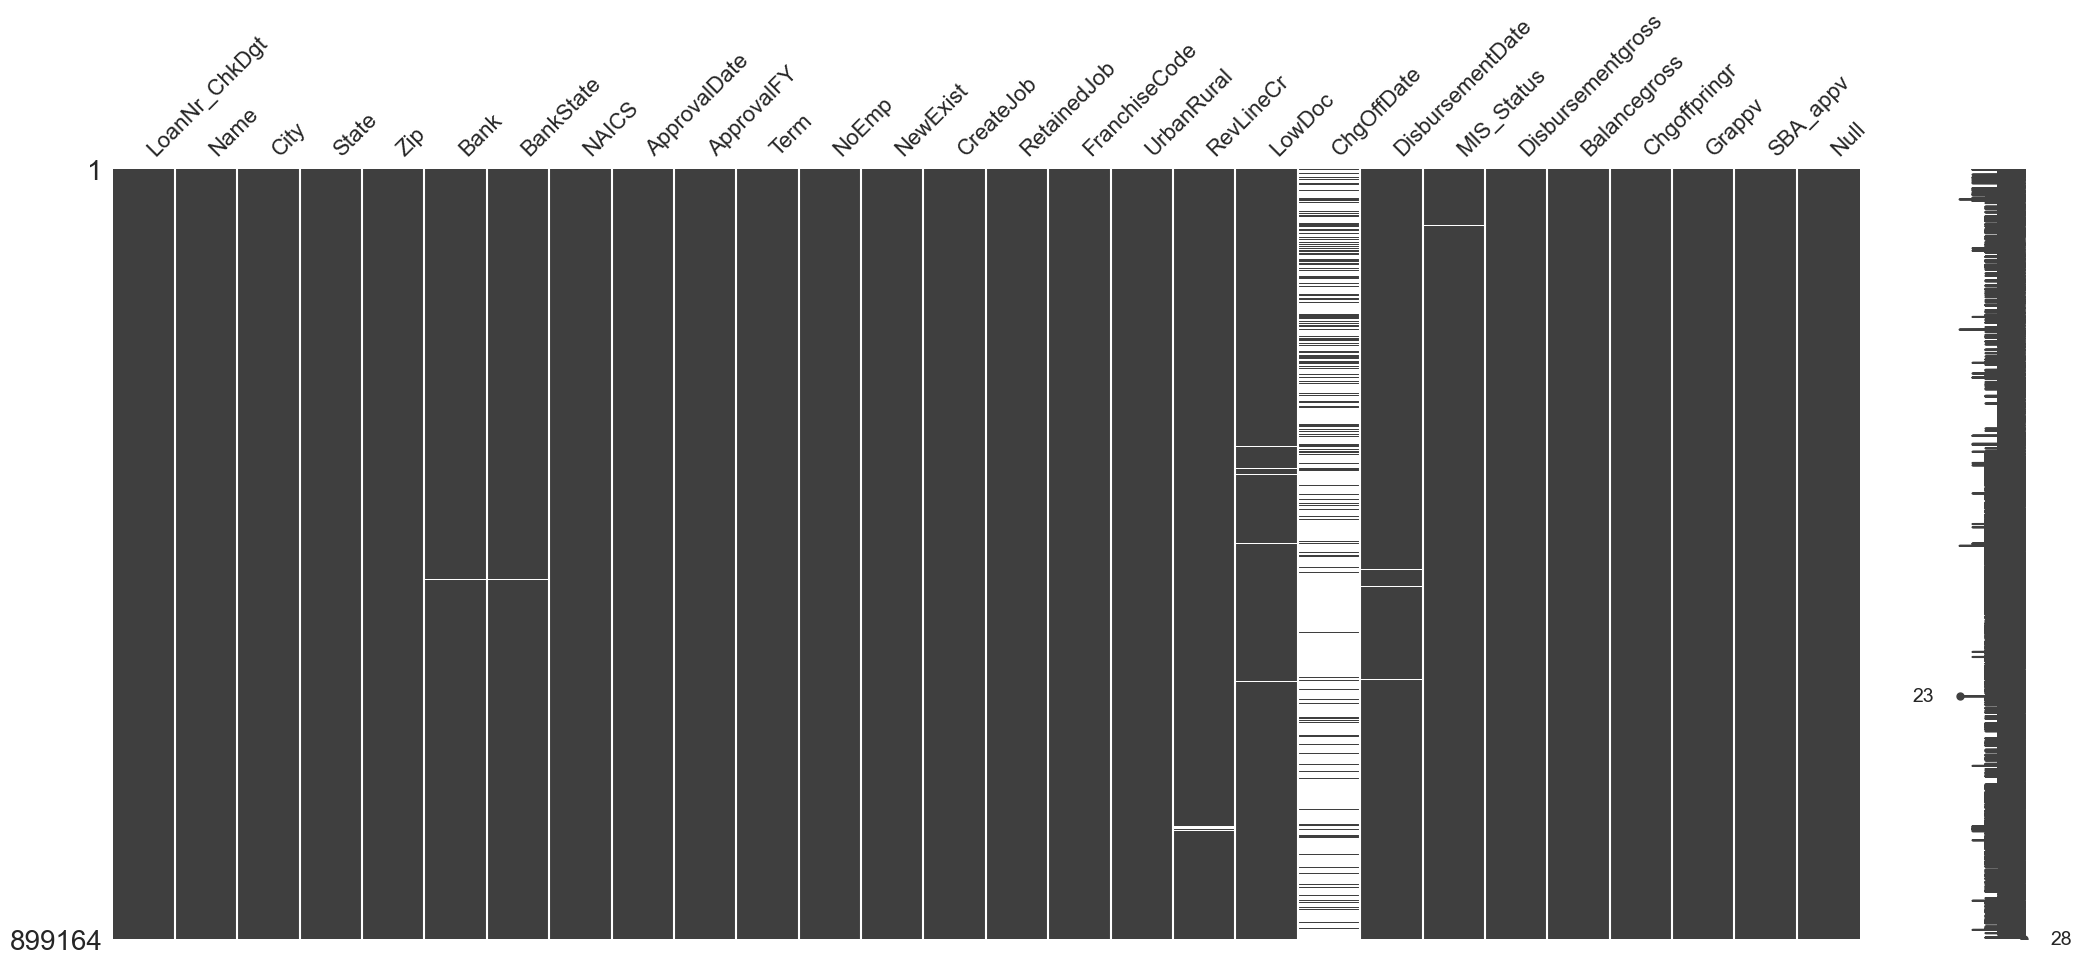

In [269]:
msno.matrix(data)

In [270]:
len(data[(data['BankState'].isna())&(~data['Bank'].isna())])

7

In [271]:
bn=data[(data['BankState'].isna())&(~data['Bank'].isna())]
bn['Bank'].unique()

array(['KOREA EXCHANGE BANK', 'STANDARD CHARTERED BK KOREA LT',
       'HONGKONG & SHANGHAI BK. CORP', 'THE BANK OF EAST ASIA, LIMITED'],
      dtype=object)

In [272]:
pd.concat([data[data['Bank']=='KOREA EXCHANGE BANK'],
                data[data['Bank']=='HONGKONG & SHANGHAI BK. CORP'],
                    data[data['Bank']=='STANDARD CHARTERED BK KOREA LT'],
                        data[data['Bank']=='THE BANK OF EAST ASIA, LIMITED']], axis=0, ignore_index=True)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,MIS_Status,Disbursementgross,Balancegross,Chgoffpringr,Grappv,SBA_appv,Null
0,2060334001,"IBA AND KANG TRADING, INC",NEW YORK,NY,10001,KOREA EXCHANGE BANK,NaN,421940,15-May-98,1998,36,2,1.0,0,0,1,0,0,Y,NaN,31-Jul-98,P I F,30000,0,0,30000,24000,True
1,4317873009,LIBERTY RESEARCH GROUP INC,GREAT FALLS,MT,59401,HONGKONG & SHANGHAI BK. CORP,NaN,0,5-Dec-90,1991,31,4,1.0,0,0,1,0,N,N,NaN,31-Jan-91,P I F,125000,0,0,125000,112500,True
2,6910891001,SOMIS SAND & ROCK,SAN DIMAS,CA,91773,HONGKONG & SHANGHAI BK. CORP,NaN,0,14-Dec-73,1974,84,4,1.0,0,0,0,0,N,N,13-Jan-89,25-Jan-74,CHGOFF,350000,0,323336,350000,315000,True
3,4102493005,"CHASE INTERNATIONAL, INC.",CHICAGO,IL,60609,STANDARD CHARTERED BK KOREA LT,NaN,339931,21-May-90,1990,84,16,1.0,0,0,1,0,N,N,NaN,31-Oct-90,P I F,500000,0,0,500000,425000,True
4,4346453000,"ACME MFG. SPECIALTY, INC.",ELK GROVE VILLAGE,IL,60007,STANDARD CHARTERED BK KOREA LT,NaN,0,15-Jan-91,1991,59,17,1.0,0,0,1,0,N,N,1-Dec-93,30-Apr-91,CHGOFF,500000,0,129654,500000,425000,True
5,8462443003,ATEN-RA INT. GOURMET DELI,NEW YORK,NY,10002,"THE BANK OF EAST ASIA, LIMITED",NaN,0,27-Jun-95,1995,60,3,2.0,0,0,1,0,N,Y,NaN,31-Oct-95,P I F,20000,0,0,20000,18000,True
6,9236363010,"SACO INTERNATIONAL, INC.",NEW YORK,NY,10017,"THE BANK OF EAST ASIA, LIMITED",NaN,422330,30-Apr-96,1996,12,6,1.0,0,0,1,0,N,N,NaN,24-May-96,P I F,400000,0,0,400000,300000,True


In [273]:
veri=data[~data['BankState'].isna()]
veri

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,MIS_Status,Disbursementgross,Balancegross,Chgoffpringr,Grappv,SBA_appv,Null
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,P I F,60000,0,0,60000,48000,False
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,P I F,40000,0,0,40000,32000,False
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,P I F,287000,0,0,287000,215250,False
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,P I F,35000,0,0,35000,28000,False
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,P I F,229000,0,0,229000,229000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,P I F,70000,0,0,70000,56000,False
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,P I F,85000,0,0,85000,42500,False
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,P I F,300000,0,0,300000,225000,False
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,CHGOFF,75000,0,46383,75000,60000,False


In [274]:
print("City sutunundaki unikal deyerler sayi :",len(veri['City'].unique()))

veri['City'].value_counts()

City sutunundaki unikal deyerler sayi : 32555


City
LOS ANGELES         11529
HOUSTON             10226
NEW YORK             7831
CHICAGO              6018
MIAMI                5591
                    ...  
EASTON PARK             1
FLEMDALE                1
Bullhead City           1
WEST TOLUCA LAKE        1
SO. OZONE PARK          1
Name: count, Length: 32554, dtype: int64

In [275]:
veri['NewExist'].value_counts()

NewExist
1.0    643693
2.0    252737
0.0      1032
Name: count, dtype: int64

In [276]:
veri.loc[veri['NewExist'].isna(), 'NewExist']=0.0

In [277]:
veri['NewExist'].isnull().sum()

0

In [278]:
veri['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

In [279]:
len(veri[veri['RevLineCr'].isna()])

4519

In [280]:
veri.loc[veri['RevLineCr'].isna(), 'RevLineCr']='NotKnown'

In [281]:
veri['RevLineCr'].isnull().sum()

0

In [282]:
veri['LowDoc'].unique()

array(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'], dtype=object)

In [283]:
len(veri[veri['LowDoc'].isna()])

2582

In [284]:
veri.loc[veri['LowDoc'].isna(), 'LowDoc']='NotKnown'

In [285]:
veri['LowDoc'].isnull().sum()

0

In [286]:
veri.loc[(veri['Chgoffpringr']!=0)&(veri['MIS_Status'].isna())&(~veri['ChgOffDate'].isna()), "MIS_Status"]="CHGOFF"
veri.loc[(veri['Chgoffpringr']==0)&(veri['MIS_Status'].isna())&(veri['ChgOffDate'].isna()), "MIS_Status"]="P I F"

In [287]:
veri['MIS_Status'].isnull().sum()

4

In [288]:
veri[veri['MIS_Status'].isna()]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,MIS_Status,Disbursementgross,Balancegross,Chgoffpringr,Grappv,SBA_appv,Null
4107,1028043007,PETIT BOIS RACQUET CLUB,BILOXI,MS,39531,REGIONS BANK,AL,0,21-Aug-80,1980,228,12,1.0,0,0,0,0,N,N,20-Dec-88,6-Mar-81,NaN,0,0,0,499200,449280,True
706125,7343781000,STUMP HOME SPECIALTIES MFG.,SOUTH BEND,IN,46614,WELLS FARGO BANK NATL ASSOC,IN,0,20-Dec-77,1978,84,7,1.0,0,0,0,0,N,N,3-Apr-92,6-Apr-78,NaN,0,0,0,270000,243000,True
718707,7482241002,HALEAKA FASHION INC,HONOLULU,HI,96814,BANK OF HAWAII,HI,0,30-May-75,1975,96,15,1.0,0,0,0,0,N,N,25-Aug-89,NaN,NaN,0,0,0,95000,71250,True
875538,9468071002,LORNE F. & HELEN L. HOLTMEIER,SALEM,OR,97302,"SECURITY NTL PARTNERS, A LTD",LA,0,3-Jul-80,1980,267,6,2.0,0,0,0,0,N,N,1-Aug-95,25-Aug-80,NaN,0,0,0,85000,76500,True


In [289]:
veri.loc[veri['MIS_Status'].isna(), "MIS_Status"]="CHGOFF"

In [290]:
veri['MIS_Status'].isnull().sum()

0

In [291]:
veri['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

In [292]:
veri.loc[veri['ApprovalFY']=='1976A', "ApprovalFY"]='1976'

veri['ApprovalFY']=veri['ApprovalFY'].astype(int)

In [293]:
veri.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     28
State                    13
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           735029
DisbursementDate       2313
MIS_Status                0
Disbursementgross         0
Balancegross              0
Chgoffpringr              0
Grappv                    0
SBA_appv                  0
Null                      0
dtype: int64

In [294]:
veri.drop(['State','LoanNr_ChkDgt','Name','City','Zip','Bank','ApprovalDate','ChgOffDate','DisbursementDate','Disbursementgross','Balancegross','Chgoffpringr'], axis=1, inplace=True)

In [295]:
print(veri.isnull().sum())

veri.head(5)

BankState        0
NAICS            0
ApprovalFY       0
Term             0
NoEmp            0
NewExist         0
CreateJob        0
RetainedJob      0
FranchiseCode    0
UrbanRural       0
RevLineCr        0
LowDoc           0
MIS_Status       0
Grappv           0
SBA_appv         0
Null             0
dtype: int64


,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,Grappv,SBA_appv,Null
0,OH,451120,1997,84,4,2.0,0,0,1,0,N,Y,P I F,60000,48000,False
1,IN,722410,1997,60,2,2.0,0,0,1,0,N,Y,P I F,40000,32000,False
2,IN,621210,1997,180,7,1.0,0,0,1,0,N,N,P I F,287000,215250,False
3,OK,0,1997,60,2,1.0,0,0,1,0,N,Y,P I F,35000,28000,False
4,FL,0,1997,240,14,1.0,7,7,1,0,N,N,P I F,229000,229000,False


## Duplicate

In [296]:
veri.shape

(897598, 16)

In [297]:
veri.drop_duplicates(inplace=True)

In [298]:
veri.shape

(886731, 16)

## Outlier Sütunu yaratmaq

In [299]:
def outlier(columnslar):
    melumat = columnslar[['ApprovalFY', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'Grappv', 'SBA_appv']]
    outlier_flags = np.zeros(melumat.shape[0], dtype=bool)
    
    for col in melumat.columns:
        q1 = melumat[col].quantile(0.25)
        q3 = melumat[col].quantile(0.75)
        IQR = q3 - q1

        lower_limit = q1 - IQR * 1.5
        upper_limit = q3 + IQR * 1.5
            
        outlier_flags = outlier_flags | ((melumat[col] < lower_limit) | (melumat[col] > upper_limit))

    return outlier_flags.astype(int) 

In [300]:
veri["Outlier"]=outlier(veri).astype(int)

In [301]:
veri

,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,Grappv,SBA_appv,Null,Outlier
0,OH,451120,1997,84,4,2.0,0,0,1,0,N,Y,P I F,60000,48000,False,0
1,IN,722410,1997,60,2,2.0,0,0,1,0,N,Y,P I F,40000,32000,False,0
2,IN,621210,1997,180,7,1.0,0,0,1,0,N,N,P I F,287000,215250,False,0
3,OK,0,1997,60,2,1.0,0,0,1,0,N,Y,P I F,35000,28000,False,0
4,FL,0,1997,240,14,1.0,7,7,1,0,N,N,P I F,229000,229000,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,IL,451120,1997,60,6,1.0,0,0,1,0,0,N,P I F,70000,56000,False,0
899160,IL,451130,1997,60,6,1.0,0,0,1,0,Y,N,P I F,85000,42500,False,0
899161,CA,332321,1997,108,26,1.0,0,0,1,0,N,N,P I F,300000,225000,False,1
899162,HI,0,1997,60,6,1.0,0,0,1,0,N,Y,CHGOFF,75000,60000,False,0


In [302]:
veri['Outlier']=veri['Outlier'].apply(lambda col : "Beli" if col==1 else "Xeyir")

In [303]:
veri.head(4)

,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,Grappv,SBA_appv,Null,Outlier
0,OH,451120,1997,84,4,2.0,0,0,1,0,N,Y,P I F,60000,48000,False,Xeyir
1,IN,722410,1997,60,2,2.0,0,0,1,0,N,Y,P I F,40000,32000,False,Xeyir
2,IN,621210,1997,180,7,1.0,0,0,1,0,N,N,P I F,287000,215250,False,Xeyir
3,OK,0,1997,60,2,1.0,0,0,1,0,N,Y,P I F,35000,28000,False,Xeyir


## Outlier'leri sixmaq

In [304]:
print("Term :",veri['Term'].max())
print("NoEmp :",veri['NoEmp'].max())
print("CreateJob :",veri['CreateJob'].max())
print("RetaineJob :",veri['RetainedJob'].max())
print("Grappv :",veri['Grappv'].max())
print("SBA_appv :",veri['SBA_appv'].max())
print("ApprovalFY :",veri['ApprovalFY'].max())

Term : 569
NoEmp : 9999
CreateJob : 8800
RetaineJob : 9500
Grappv : 5472000
SBA_appv : 5472000
ApprovalFY : 2014


In [305]:
def outliers(melumat):
    for col in melumat[['ApprovalFY', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'Grappv', 'SBA_appv']].columns:
        q1 = melumat[col].quantile(0.25)
        q3 = melumat[col].quantile(0.75)
        IQR = q3 - q1

        lower_limit = q1 - IQR * 1.5
        upper_limit = q3 + IQR * 1.5
        
        melumat[col] = np.where(melumat[col] >= upper_limit, upper_limit, np.where(melumat[col] <= lower_limit, lower_limit, melumat[col]))

In [306]:
outliers(veri)

In [307]:
veri

,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,Grappv,SBA_appv,Null,Outlier
0,OH,451120,1997.0,84.0,4.0,2.0,0.0,0.0,1,0,N,Y,P I F,60000.0,48000.0,False,Xeyir
1,IN,722410,1997.0,60.0,2.0,2.0,0.0,0.0,1,0,N,Y,P I F,40000.0,32000.0,False,Xeyir
2,IN,621210,1997.0,180.0,7.0,1.0,0.0,0.0,1,0,N,N,P I F,287000.0,215250.0,False,Xeyir
3,OK,0,1997.0,60.0,2.0,1.0,0.0,0.0,1,0,N,Y,P I F,35000.0,28000.0,False,Xeyir
4,FL,0,1997.0,210.0,14.0,1.0,2.5,7.0,1,0,N,N,P I F,229000.0,229000.0,False,Beli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,IL,451120,1997.0,60.0,6.0,1.0,0.0,0.0,1,0,0,N,P I F,70000.0,56000.0,False,Xeyir
899160,IL,451130,1997.0,60.0,6.0,1.0,0.0,0.0,1,0,Y,N,P I F,85000.0,42500.0,False,Xeyir
899161,CA,332321,1997.0,108.0,22.0,1.0,0.0,0.0,1,0,N,N,P I F,300000.0,225000.0,False,Beli
899162,HI,0,1997.0,60.0,6.0,1.0,0.0,0.0,1,0,N,Y,CHGOFF,75000.0,60000.0,False,Xeyir


In [308]:
veri['RetainedJob']=veri['RetainedJob'].astype(int)
veri['ApprovalFY']=veri['ApprovalFY'].astype(int)
veri['CreateJob']=veri['CreateJob'].astype(int)
veri['SBA_appv']=veri['SBA_appv'].astype(int)
veri['NewExist']=veri['NewExist'].astype(int)
veri['Grappv']=veri['Grappv'].astype(int)
veri['NoEmp']=veri['NoEmp'].astype(int)
veri['Term']=veri["Term"].astype(int)

In [309]:
print("Term :",veri['Term'].max())
print("NoEmp :",veri['NoEmp'].max())
print("CreateJob :",veri['CreateJob'].max())
print("RetaineJob :",veri['RetainedJob'].max())
print("Grappv :",veri['Grappv'].max())
print("SBA_appv :",veri['SBA_appv'].max())
print("ApprovalFY :",veri['ApprovalFY'].max())

Term : 210
NoEmp : 22
CreateJob : 2
RetaineJob : 10
Grappv : 521500
SBA_appv : 407600
ApprovalFY : 2014


In [310]:
veri.head(4)

,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,Grappv,SBA_appv,Null,Outlier
0,OH,451120,1997,84,4,2,0,0,1,0,N,Y,P I F,60000,48000,False,Xeyir
1,IN,722410,1997,60,2,2,0,0,1,0,N,Y,P I F,40000,32000,False,Xeyir
2,IN,621210,1997,180,7,1,0,0,1,0,N,N,P I F,287000,215250,False,Xeyir
3,OK,0,1997,60,2,1,0,0,1,0,N,Y,P I F,35000,28000,False,Xeyir


## Feature Engineering

MIS_Status

In [311]:
veri.loc[veri['MIS_Status']=="P I F", "MIS_Status"]=1
veri.loc[veri['MIS_Status']=="CHGOFF", "MIS_Status"]=0

In [312]:
veri.head(4)

,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,Grappv,SBA_appv,Null,Outlier
0,OH,451120,1997,84,4,2,0,0,1,0,N,Y,1,60000,48000,False,Xeyir
1,IN,722410,1997,60,2,2,0,0,1,0,N,Y,1,40000,32000,False,Xeyir
2,IN,621210,1997,180,7,1,0,0,1,0,N,N,1,287000,215250,False,Xeyir
3,OK,0,1997,60,2,1,0,0,1,0,N,Y,1,35000,28000,False,Xeyir


NAICS

In [313]:
veri['NAICS'].value_counts()

NAICS
0         197318
722110     27742
722211     19306
811111     14269
621210     13924
           ...  
927110         1
325192         1
327410         1
314992         1
922110         1
Name: count, Length: 1312, dtype: int64

In [314]:
veri.loc[(veri['NAICS'].astype(str).str.startswith("31"))|(veri['NAICS'].astype(str).str.startswith("32"))|(veri['NAICS'].astype(str).str.startswith("33")), "NAICS"]="Manufacturing"
veri.loc[(veri['NAICS'].astype(str).str.startswith("48"))|(veri['NAICS'].astype(str).str.startswith("49")), "NAICS"]="Transportation and Warehousing"
veri.loc[(veri['NAICS'].astype(str).str.startswith("44"))|(veri['NAICS'].astype(str).str.startswith("45")), "NAICS"]="Retail Trade"
veri.loc[veri['NAICS'].astype(str).str.startswith("56"), "NAICS"]="Administrative and Support and Waste Management and Remediation Services"
veri.loc[veri['NAICS'].astype(str).str.startswith("54"), "NAICS"]="Professional Scientific and Technical Services"
veri.loc[veri['NAICS'].astype(str).str.startswith("21"), "NAICS"]="Mining Quarrying and Oil and Gas Extraction"
veri.loc[veri['NAICS'].astype(str).str.startswith("11"), "NAICS"]="Agriculture Forestry Fishing and Hunting"
veri.loc[veri['NAICS'].astype(str).str.startswith("55"), "NAICS"]="Management of Companies and Enterprises"
veri.loc[veri['NAICS'].astype(str).str.startswith("71"), "NAICS"]="Arts Entertainment and Recreation"
veri.loc[veri['NAICS'].astype(str).str.startswith("53"), "NAICS"]="Real Estate and Rental and Leasing"
veri.loc[veri['NAICS'].astype(str).str.startswith("62"), "NAICS"]="Health Care and Social Assistance"
veri.loc[veri['NAICS'].astype(str).str.startswith("72"), "NAICS"]="Accommodation and Food Services"
veri.loc[veri['NAICS'].astype(str).str.startswith("92"), "NAICS"]="Public Administration"
veri.loc[veri['NAICS'].astype(str).str.startswith("52"), "NAICS"]="Finance and Insurance"
veri.loc[veri['NAICS'].astype(str).str.startswith("61"), "NAICS"]="Educational Services"
veri.loc[veri['NAICS'].astype(str).str.startswith("42"), "NAICS"]="Wholesale Trade"
veri.loc[veri['NAICS'].astype(str).str.startswith("81"), "NAICS"]="Other Services"
veri.loc[veri['NAICS'].astype(str).str.startswith("23"), "NAICS"]="Construction"
veri.loc[veri['NAICS'].astype(str).str.startswith("51"), "NAICS"]="Information"
veri.loc[veri['NAICS'].astype(str).str.startswith("22"), "NAICS"]="Utilities"
veri.loc[veri['NAICS'].astype(str).str.startswith("0"), "NAICS"]="Not Known"

In [315]:
veri.head(8)

,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,Grappv,SBA_appv,Null,Outlier
0,OH,Retail Trade,1997,84,4,2,0,0,1,0,N,Y,1,60000,48000,False,Xeyir
1,IN,Accommodation and Food Services,1997,60,2,2,0,0,1,0,N,Y,1,40000,32000,False,Xeyir
2,IN,Health Care and Social Assistance,1997,180,7,1,0,0,1,0,N,N,1,287000,215250,False,Xeyir
3,OK,Not Known,1997,60,2,1,0,0,1,0,N,Y,1,35000,28000,False,Xeyir
4,FL,Not Known,1997,210,14,1,2,7,1,0,N,N,1,229000,229000,False,Beli
5,DE,Manufacturing,1997,120,19,1,0,0,1,0,N,N,1,517000,387750,False,Xeyir
6,SD,Not Known,1983,45,22,2,0,0,0,0,N,N,0,521500,407600,False,Beli
7,AL,Other Services,1997,84,1,2,0,0,1,0,N,Y,1,45000,36000,False,Xeyir


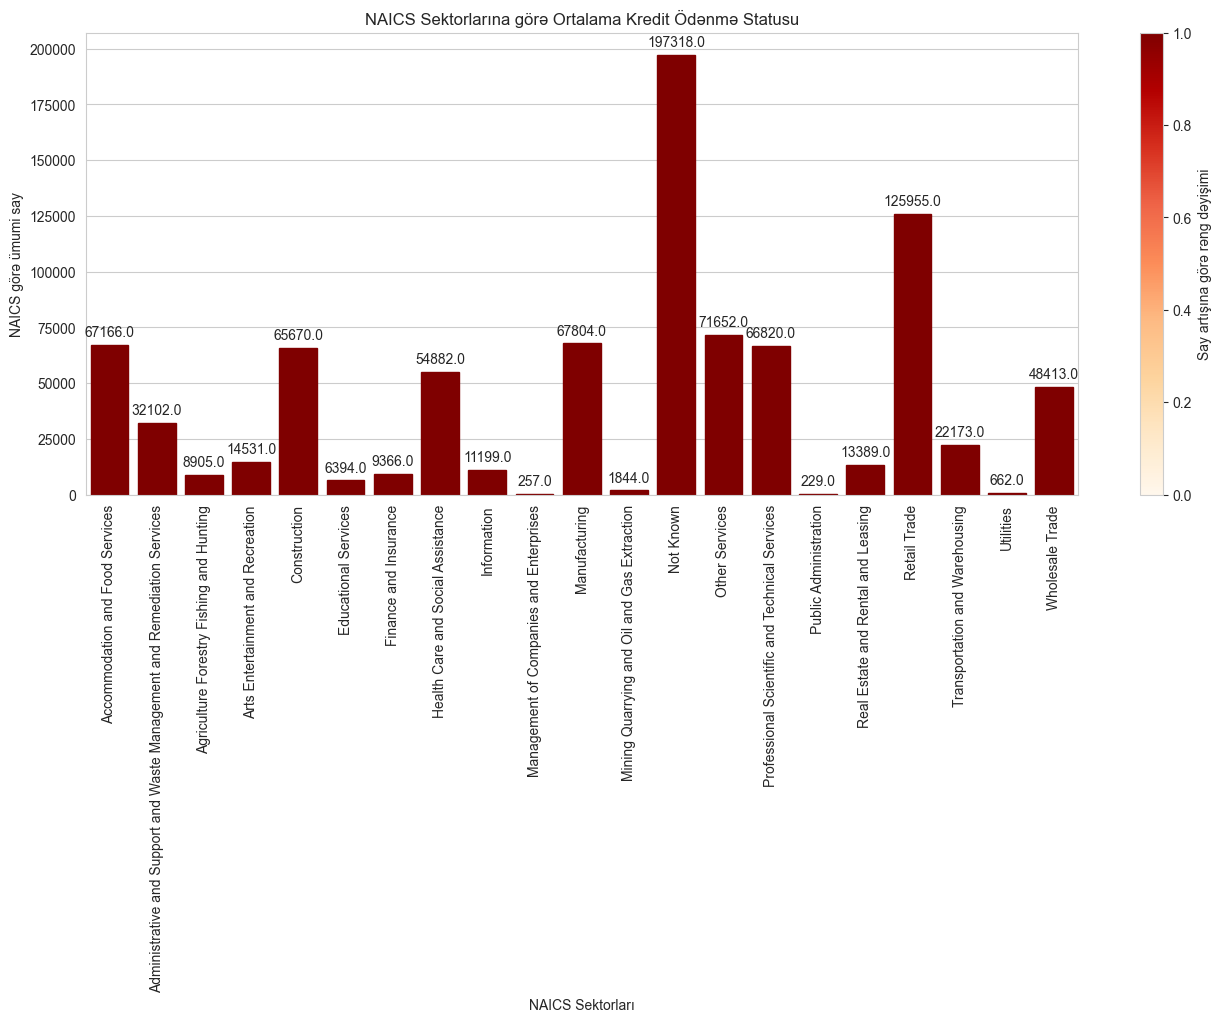

In [316]:
naics_say_status =  veri.groupby('NAICS').agg({"MIS_Status" : "count"}).reset_index()

plt.figure(figsize=(16, 6))
ax=sns.barplot(x='NAICS', y='MIS_Status', data=naics_say_status, ci=None, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = plt.get_cmap('OrRd')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


for bar, val in zip(ax.patches, naics_say_status['MIS_Status']):
    color = cmap(norm(val))
    bar.set_color(color)

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Say artışına görə rəng dəyişimi')

plt.title('NAICS Sektorlarına görə Ortalama Kredit Ödənmə Statusu')
plt.xlabel('NAICS Sektorları')
plt.ylabel('NAICS görə ümumi say')
plt.xticks(rotation=90)
plt.show()

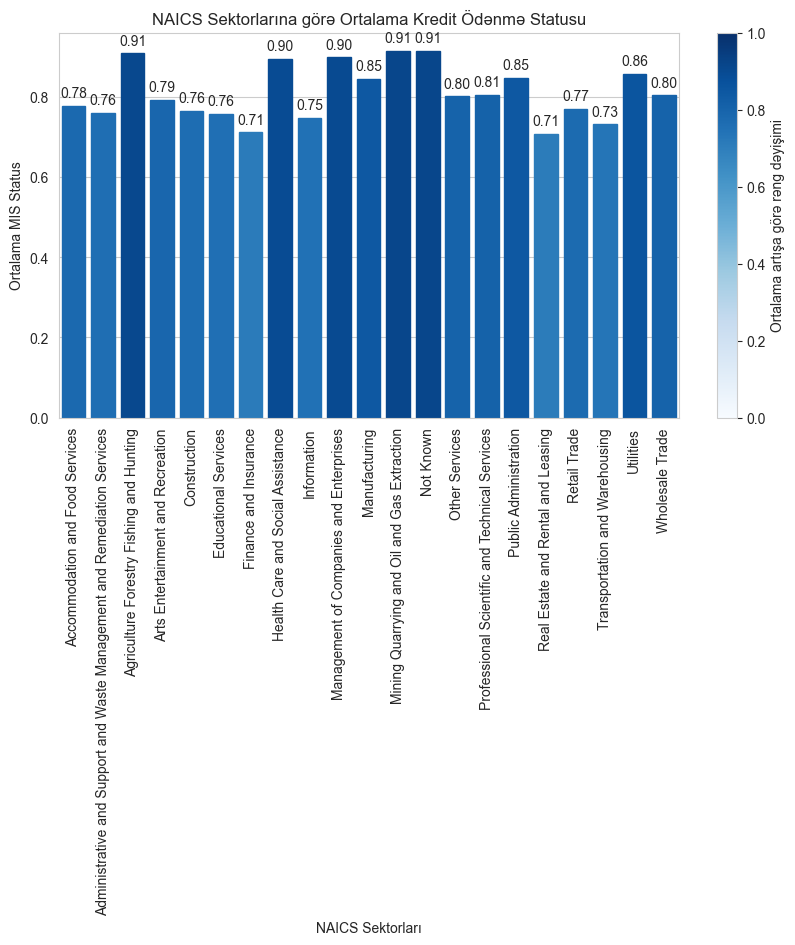

In [317]:
naics_ortalama_status =  veri.groupby('NAICS').agg({"MIS_Status" : "mean"}).reset_index()

plt.figure(figsize=(10, 5))
ax=sns.barplot(x='NAICS', y='MIS_Status', data=naics_ortalama_status, ci=None, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = plt.get_cmap('Blues')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


for bar, val in zip(ax.patches, naics_ortalama_status['MIS_Status']):
    color = cmap(norm(val))
    bar.set_color(color)

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Ortalama artışa görə rəng dəyişimi')

plt.title('NAICS Sektorlarına görə Ortalama Kredit Ödənmə Statusu')
plt.xlabel('NAICS Sektorları')
plt.ylabel('Ortalama MIS Status')
plt.xticks(rotation=90)
plt.show()

Franchise Code

In [318]:
veri['FranchiseCode'].value_counts()

FranchiseCode
1        629610
0        205584
78760      3361
68020      1898
50564      1023
          ...  
51003         1
63615         1
3488          1
10490         1
15930         1
Name: count, Length: 2765, dtype: int64

In [319]:
veri.loc[(veri['FranchiseCode']==1)|(veri['FranchiseCode']==0), "FranchiseCode"]="No Franchise"

In [320]:
veri.loc[veri['FranchiseCode']!="No Franchise", "FranchiseCode"]="Yes Franchise"

In [321]:
veri['FranchiseCode'].value_counts()

FranchiseCode
No Franchise     835194
Yes Franchise     51537
Name: count, dtype: int64

In [322]:
veri.head(4)

,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,Grappv,SBA_appv,Null,Outlier
0,OH,Retail Trade,1997,84,4,2,0,0,No Franchise,0,N,Y,1,60000,48000,False,Xeyir
1,IN,Accommodation and Food Services,1997,60,2,2,0,0,No Franchise,0,N,Y,1,40000,32000,False,Xeyir
2,IN,Health Care and Social Assistance,1997,180,7,1,0,0,No Franchise,0,N,N,1,287000,215250,False,Xeyir
3,OK,Not Known,1997,60,2,1,0,0,No Franchise,0,N,Y,1,35000,28000,False,Xeyir


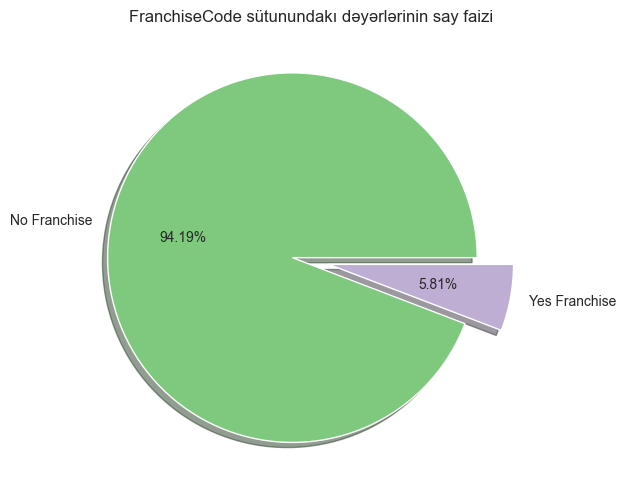

In [323]:
status_say = veri["FranchiseCode"].value_counts()

colorss = sns.color_palette('Accent')

sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
plt.pie(status_say, 
        labels=status_say.index, 
        autopct='%.2f%%', 
        colors=colorss, 
        explode=[0.1]*len(status_say),
        shadow=True,
        wedgeprops=dict(edgecolor='w', linewidth=1))
plt.title('FranchiseCode sütunundakı dəyərlərinin say faizi')
plt.show()

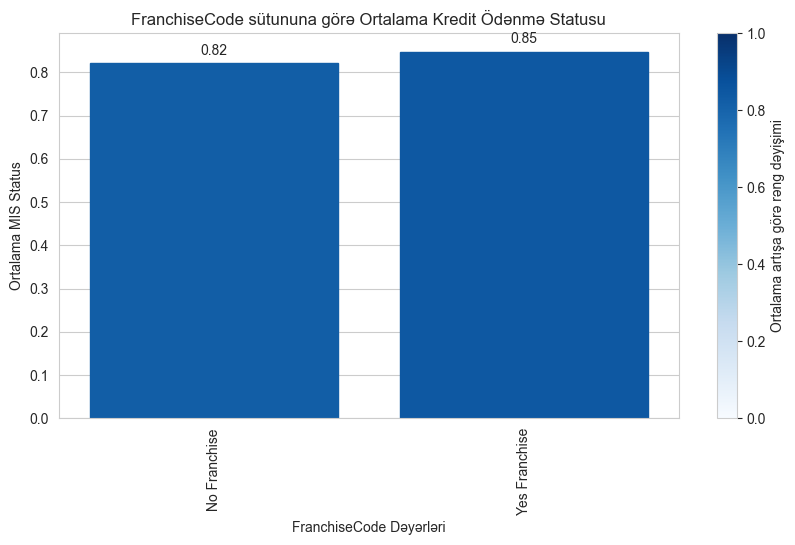

In [324]:
naics_ortalama_status =  veri.groupby('FranchiseCode').agg({"MIS_Status" : "mean"}).reset_index()

plt.figure(figsize=(10, 5))
ax=sns.barplot(x='FranchiseCode', y='MIS_Status', data=naics_ortalama_status, ci=None, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = plt.get_cmap('Blues')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


for bar, val in zip(ax.patches, naics_ortalama_status['MIS_Status']):
    color = cmap(norm(val))
    bar.set_color(color)

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Ortalama artışa görə rəng dəyişimi')

plt.title('FranchiseCode sütununa görə Ortalama Kredit Ödənmə Statusu')
plt.xlabel('FranchiseCode Dəyərləri')
plt.ylabel('Ortalama MIS Status')
plt.xticks(rotation=90)
plt.show()

RevLineCr

In [325]:
veri['RevLineCr'].value_counts()

RevLineCr
N           415770
0           255565
Y           195656
T            15169
NotKnown      4506
1               23
R               14
`               11
2                6
C                2
5                1
-                1
4                1
.                1
3                1
A                1
7                1
,                1
Q                1
Name: count, dtype: int64

In [326]:
veri['RevLineCr'].value_counts(normalize=True)

RevLineCr
N           0.468880
0           0.288210
Y           0.220649
T           0.017107
NotKnown    0.005082
1           0.000026
R           0.000016
`           0.000012
2           0.000007
C           0.000002
5           0.000001
-           0.000001
4           0.000001
.           0.000001
3           0.000001
A           0.000001
7           0.000001
,           0.000001
Q           0.000001
Name: proportion, dtype: float64

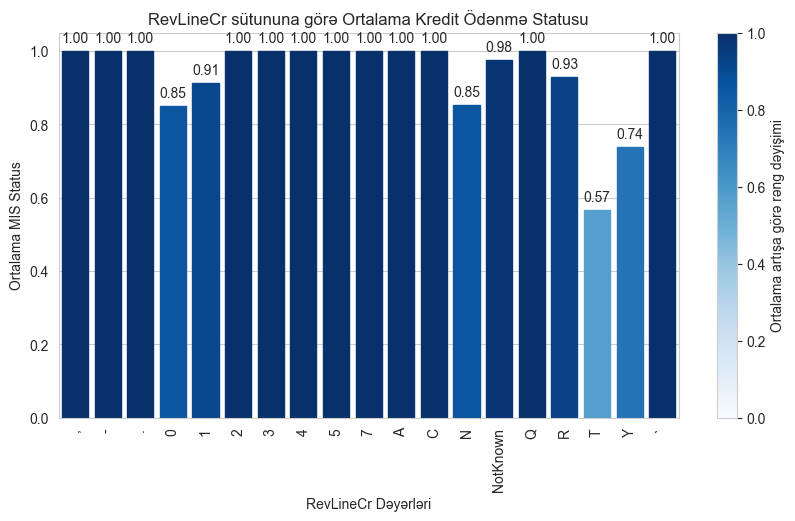

In [327]:
naics_ortalama_status =  veri.groupby('RevLineCr').agg({"MIS_Status" : "mean"}).reset_index()

plt.figure(figsize=(10, 5))
ax=sns.barplot(x='RevLineCr', y='MIS_Status', data=naics_ortalama_status, ci=None, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = plt.get_cmap('Blues')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


for bar, val in zip(ax.patches, naics_ortalama_status['MIS_Status']):
    color = cmap(norm(val))
    bar.set_color(color)

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Ortalama artışa görə rəng dəyişimi')

plt.title('RevLineCr sütununa görə Ortalama Kredit Ödənmə Statusu')
plt.xlabel('RevLineCr Dəyərləri')
plt.ylabel('Ortalama MIS Status')
plt.xticks(rotation=90)
plt.show()

In [328]:
rev=veri['RevLineCr'].value_counts()
revline=rev[rev<4000].index
revline

Index(['1', 'R', '`', '2', 'C', '5', '-', '4', '.', '3', 'A', '7', ',', 'Q'], dtype='object', name='RevLineCr')

In [329]:
veri=veri[~veri['RevLineCr'].isin(revline)]

veri['RevLineCr'].value_counts()

RevLineCr
N           415770
0           255565
Y           195656
T            15169
NotKnown      4506
Name: count, dtype: int64

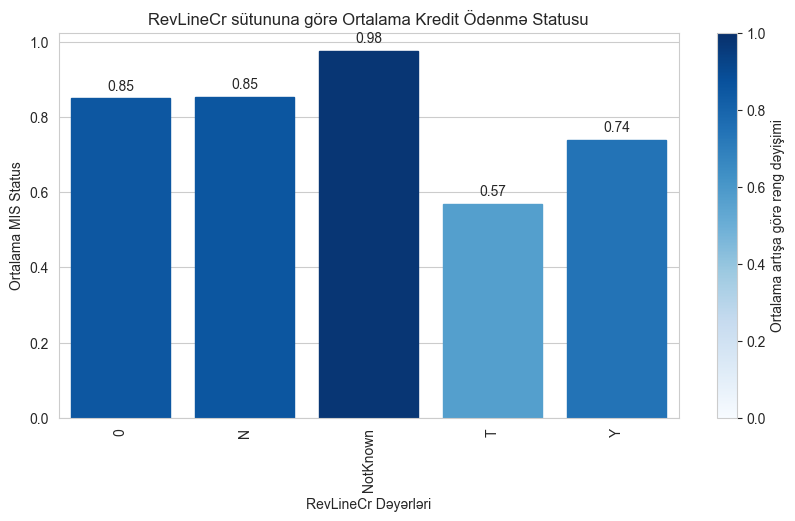

In [330]:
naics_ortalama_status =  veri.groupby('RevLineCr').agg({"MIS_Status" : "mean"}).reset_index()

plt.figure(figsize=(10, 5))
ax=sns.barplot(x='RevLineCr', y='MIS_Status', data=naics_ortalama_status, ci=None, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = plt.get_cmap('Blues')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


for bar, val in zip(ax.patches, naics_ortalama_status['MIS_Status']):
    color = cmap(norm(val))
    bar.set_color(color)

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Ortalama artışa görə rəng dəyişimi')

plt.title('RevLineCr sütununa görə Ortalama Kredit Ödənmə Statusu')
plt.xlabel('RevLineCr Dəyərləri')
plt.ylabel('Ortalama MIS Status')
plt.xticks(rotation=90)
plt.show()

In [331]:
veri.loc[veri['RevLineCr']=='0', "RevLineCr"]='N'

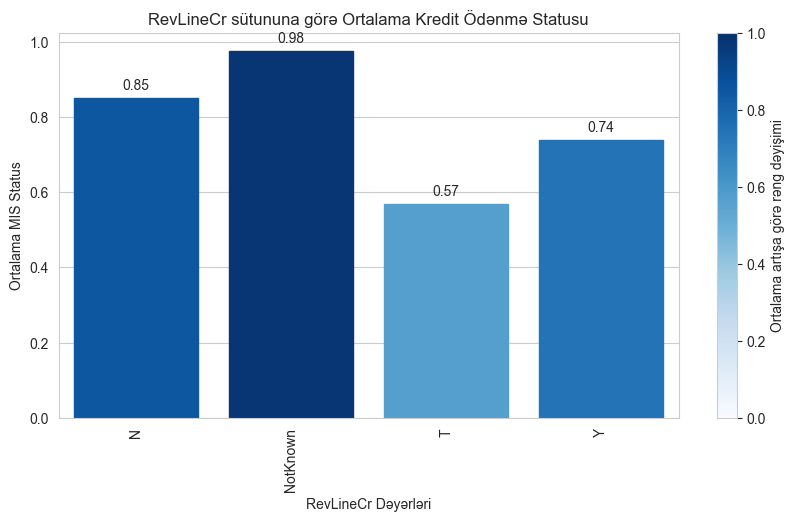

In [332]:
naics_ortalama_status =  veri.groupby('RevLineCr').agg({"MIS_Status" : "mean"}).reset_index()

plt.figure(figsize=(10, 5))
ax=sns.barplot(x='RevLineCr', y='MIS_Status', data=naics_ortalama_status, ci=None, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = plt.get_cmap('Blues')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


for bar, val in zip(ax.patches, naics_ortalama_status['MIS_Status']):
    color = cmap(norm(val))
    bar.set_color(color)

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Ortalama artışa görə rəng dəyişimi')

plt.title('RevLineCr sütununa görə Ortalama Kredit Ödənmə Statusu')
plt.xlabel('RevLineCr Dəyərləri')
plt.ylabel('Ortalama MIS Status')
plt.xticks(rotation=90)
plt.show()

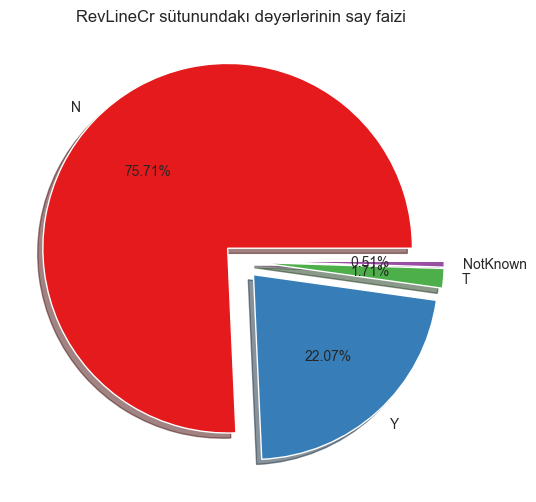

In [333]:
status_say = veri["RevLineCr"].value_counts()

colorss = sns.color_palette('Set1')

sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
plt.pie(status_say, 
        labels=status_say.index, 
        autopct='%.2f%%', 
        colors=colorss, 
        explode=[0.1]*len(status_say),
        shadow=True,
        wedgeprops=dict(edgecolor='w', linewidth=1))
plt.title('RevLineCr sütunundakı dəyərlərinin say faizi')
plt.show()

LowDoc

In [334]:
veri['LowDoc'].value_counts()

LowDoc
N           772469
Y           108200
NotKnown      2578
0             1488
C              758
S              601
A              496
R               75
1                1
Name: count, dtype: int64

In [335]:
veri['LowDoc'].value_counts(normalize=True)

LowDoc
N           0.871206
Y           0.122030
NotKnown    0.002908
0           0.001678
C           0.000855
S           0.000678
A           0.000559
R           0.000085
1           0.000001
Name: proportion, dtype: float64

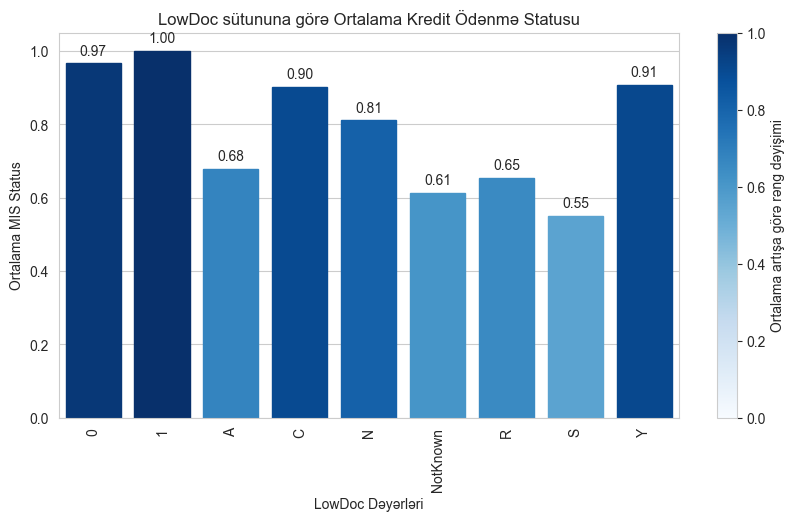

In [336]:
naics_ortalama_status =  veri.groupby('LowDoc').agg({"MIS_Status" : "mean"}).reset_index()

plt.figure(figsize=(10, 5))
ax=sns.barplot(x='LowDoc', y='MIS_Status', data=naics_ortalama_status, ci=None, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = plt.get_cmap('Blues')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


for bar, val in zip(ax.patches, naics_ortalama_status['MIS_Status']):
    color = cmap(norm(val))
    bar.set_color(color)

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Ortalama artışa görə rəng dəyişimi')

plt.title('LowDoc sütununa görə Ortalama Kredit Ödənmə Statusu')
plt.xlabel('LowDoc Dəyərləri')
plt.ylabel('Ortalama MIS Status')
plt.xticks(rotation=90)
plt.show()

In [337]:
veri.loc[veri['LowDoc']=='C', "LowDoc"]='Y'
veri.loc[veri['LowDoc']=='0', "LowDoc"]='Y'
veri['LowDoc']=veri['LowDoc'].apply(lambda x : "Other" if x in ["A", "NotKnown", 'R', "S" ] else x)
veri.drop(136428, inplace=True)

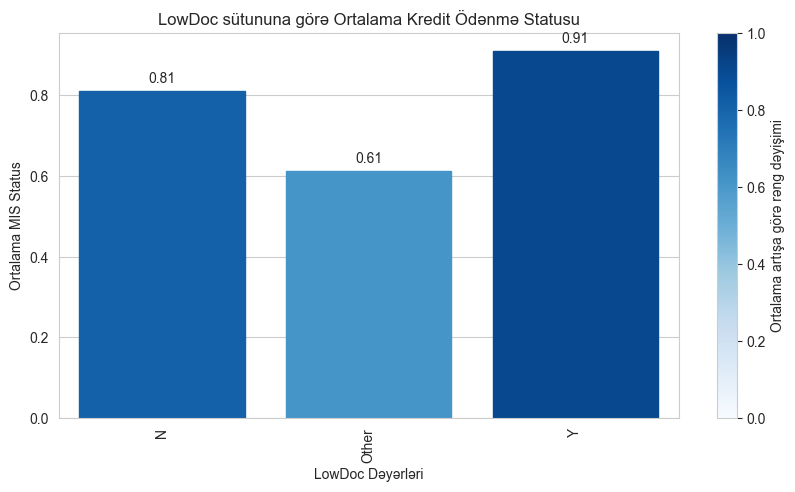

In [338]:
naics_ortalama_status =  veri.groupby('LowDoc').agg({"MIS_Status" : "mean"}).reset_index()

plt.figure(figsize=(10, 5))
ax=sns.barplot(x='LowDoc', y='MIS_Status', data=naics_ortalama_status, ci=None, color='skyblue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = plt.get_cmap('Blues')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


for bar, val in zip(ax.patches, naics_ortalama_status['MIS_Status']):
    color = cmap(norm(val))
    bar.set_color(color)

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Ortalama artışa görə rəng dəyişimi')

plt.title('LowDoc sütununa görə Ortalama Kredit Ödənmə Statusu')
plt.xlabel('LowDoc Dəyərləri')
plt.ylabel('Ortalama MIS Status')
plt.xticks(rotation=90)
plt.show()

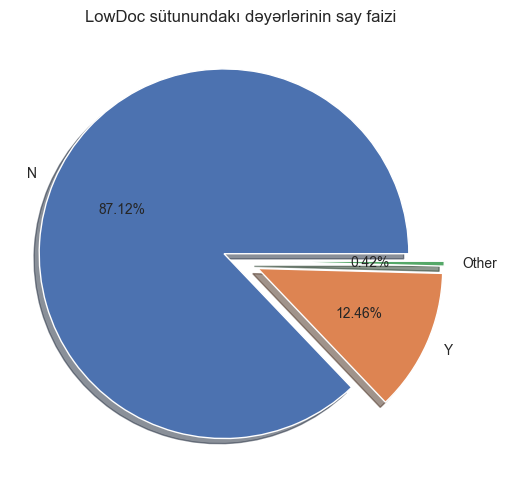

In [339]:
status_counts = veri["LowDoc"].value_counts()

colorss = sns.color_palette('deep')

sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
plt.pie(status_counts, 
        labels=status_counts.index, 
        autopct='%.2f%%', 
        colors=colorss, 
        explode=[0.1]*len(status_counts),
        shadow=True,
        wedgeprops=dict(edgecolor='w', linewidth=1))
plt.title('LowDoc sütunundakı dəyərlərinin say faizi')
plt.show()

SBA_faiz sütunu yaratmaq

In [340]:
NewFaiz=[]

for col1, col2 in zip(veri['SBA_appv'], veri['Grappv']):
    try:
        if pd.isna(col1) or pd.isna(col2) or col1==0 or col2==0:
            NewFaiz.append(None)
        else:
            NewFaiz.append((col1/col2)*100)
    except:
        NewFaiz.append(None)

veri['SBA_faiz']=NewFaiz
veri['SBA_faiz']=veri['SBA_faiz'].astype(int)

In [341]:
veri.drop("SBA_appv", axis=1, inplace=True)

In [342]:
veri.head(4)

,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,Grappv,Null,Outlier,SBA_faiz
0,OH,Retail Trade,1997,84,4,2,0,0,No Franchise,0,N,Y,1,60000,False,Xeyir,80
1,IN,Accommodation and Food Services,1997,60,2,2,0,0,No Franchise,0,N,Y,1,40000,False,Xeyir,80
2,IN,Health Care and Social Assistance,1997,180,7,1,0,0,No Franchise,0,N,N,1,287000,False,Xeyir,75
3,OK,Not Known,1997,60,2,1,0,0,No Franchise,0,N,Y,1,35000,False,Xeyir,80


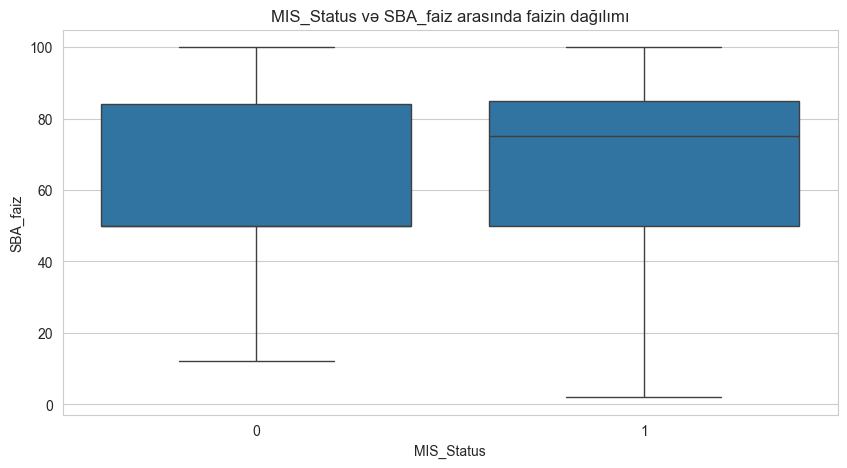

In [343]:
plt.figure(figsize=(10,5))
sns.boxplot(x="MIS_Status", y="SBA_faiz", data=veri)
plt.title("MIS_Status və SBA_faiz arasında faizin dağılımı")
plt.xlabel("MIS_Status")
plt.ylabel("SBA_faiz")
plt.show()

## ENCODING

In [344]:
veri['FranchiseCode']=np.where(veri['FranchiseCode']=="No Franchise",0,1)
veri['Null']=np.where(veri['Null']=="False",0,1)
veri['Outlier']=np.where(veri['Outlier']=="Xeyir",0,1)

In [345]:
veri.head(4)

,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,Grappv,Null,Outlier,SBA_faiz
0,OH,Retail Trade,1997,84,4,2,0,0,0,0,N,Y,1,60000,0,0,80
1,IN,Accommodation and Food Services,1997,60,2,2,0,0,0,0,N,Y,1,40000,0,0,80
2,IN,Health Care and Social Assistance,1997,180,7,1,0,0,0,0,N,N,1,287000,0,0,75
3,OK,Not Known,1997,60,2,1,0,0,0,0,N,Y,1,35000,0,0,80


One-Hot Encoding

In [346]:
liste=['NAICS','NewExist','UrbanRural','RevLineCr','LowDoc']

for col in liste:
    Onehot=pd.get_dummies(veri[col], prefix=col).astype(int)
    veri=veri.drop(col, axis=1)
    veri =pd.concat([veri, Onehot], axis=1)

veri.reset_index(drop=True, inplace=True)

In [347]:
veri

,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,MIS_Status,Grappv,Null,Outlier,SBA_faiz,NAICS_Accommodation and Food Services,NAICS_Administrative and Support and Waste Management and Remediation Services,NAICS_Agriculture Forestry Fishing and Hunting,NAICS_Arts Entertainment and Recreation,NAICS_Construction,NAICS_Educational Services,NAICS_Finance and Insurance,NAICS_Health Care and Social Assistance,NAICS_Information,NAICS_Management of Companies and Enterprises,NAICS_Manufacturing,NAICS_Mining Quarrying and Oil and Gas Extraction,NAICS_Not Known,NAICS_Other Services,NAICS_Professional Scientific and Technical Services,NAICS_Public Administration,NAICS_Real Estate and Rental and Leasing,NAICS_Retail Trade,NAICS_Transportation and Warehousing,NAICS_Utilities,NAICS_Wholesale Trade,NewExist_0,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,RevLineCr_N,RevLineCr_NotKnown,RevLineCr_T,RevLineCr_Y,LowDoc_N,LowDoc_Other,LowDoc_Y
0,OH,1997,84,4,0,0,0,1,60000,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1
1,IN,1997,60,2,0,0,0,1,40000,0,0,80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1
2,IN,1997,180,7,0,0,0,1,287000,0,0,75,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
3,OK,1997,60,2,0,0,0,1,35000,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
4,FL,1997,210,14,2,7,0,1,229000,0,1,100,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886660,IL,1997,60,6,0,0,0,1,70000,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
886661,IL,1997,60,6,0,0,0,1,85000,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0
886662,CA,1997,108,22,0,0,0,1,300000,0,1,75,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
886663,HI,1997,60,6,0,0,0,0,75000,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1


Target encoding

In [348]:
X = veri.drop(['MIS_Status'], axis=1)
y = veri['MIS_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

cols = ["BankState"]

te = ce.TargetEncoder(cols=cols)

X_train_encoded = te.fit_transform(X_train[cols], y_train)
X_test_encoded = te.transform(X_test[cols])

In [349]:
X_train['BankState'] = X_train_encoded['BankState']
X_test['BankState'] = X_test_encoded['BankState']

In [350]:
X_train

,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,Grappv,Null,Outlier,SBA_faiz,NAICS_Accommodation and Food Services,NAICS_Administrative and Support and Waste Management and Remediation Services,NAICS_Agriculture Forestry Fishing and Hunting,NAICS_Arts Entertainment and Recreation,NAICS_Construction,NAICS_Educational Services,NAICS_Finance and Insurance,NAICS_Health Care and Social Assistance,NAICS_Information,NAICS_Management of Companies and Enterprises,NAICS_Manufacturing,NAICS_Mining Quarrying and Oil and Gas Extraction,NAICS_Not Known,NAICS_Other Services,NAICS_Professional Scientific and Technical Services,NAICS_Public Administration,NAICS_Real Estate and Rental and Leasing,NAICS_Retail Trade,NAICS_Transportation and Warehousing,NAICS_Utilities,NAICS_Wholesale Trade,NewExist_0,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,RevLineCr_N,RevLineCr_NotKnown,RevLineCr_T,RevLineCr_Y,LowDoc_N,LowDoc_Other,LowDoc_Y
178883,0.77649,1998,84,1,0,0,0,5000,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0
791983,0.77649,1995,120,9,0,0,0,125000,0,0,70,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
318496,0.8307,2008,48,7,1,0,0,70000,0,0,50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
569477,0.794402,2002,84,2,0,2,0,25000,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0
585690,0.871885,1993,210,9,2,0,0,375000,0,1,100,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49723,0.745524,2005,60,1,1,1,0,10000,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
156845,0.860975,2006,210,17,0,10,1,521500,0,1,78,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
256753,0.77398,2008,7,1,1,1,0,25000,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
724387,0.77398,2004,90,22,2,10,0,131600,0,1,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0


In [351]:
X_train['BankState']=X_train['BankState'].astype(float)
X_test['BankState']=X_test['BankState'].astype(float)

y_train = y_train.astype(int)
y_test=y_test.astype(int)

## Scalling

In [352]:
sutunlar=X_test.columns
sutunlar

Index(['BankState', 'ApprovalFY', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'Grappv', 'Null', 'Outlier', 'SBA_faiz',
       'NAICS_Accommodation and Food Services',
       'NAICS_Administrative and Support and Waste Management and Remediation Services',
       'NAICS_Agriculture Forestry Fishing and Hunting',
       'NAICS_Arts Entertainment and Recreation', 'NAICS_Construction',
       'NAICS_Educational Services', 'NAICS_Finance and Insurance',
       'NAICS_Health Care and Social Assistance', 'NAICS_Information',
       'NAICS_Management of Companies and Enterprises', 'NAICS_Manufacturing',
       'NAICS_Mining Quarrying and Oil and Gas Extraction', 'NAICS_Not Known',
       'NAICS_Other Services',
       'NAICS_Professional Scientific and Technical Services',
       'NAICS_Public Administration',
       'NAICS_Real Estate and Rental and Leasing', 'NAICS_Retail Trade',
       'NAICS_Transportation and Warehousing', 'NAICS_Utilities',
       'NAICS_Wholesal

In [353]:
X_train_scaler=pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaler=pd.DataFrame(scaler.transform(X_test))

In [354]:
X_test_scaler

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,0.788333,-1.049595,1.267427,-0.756860,-0.634322,-0.723502,-0.248218,-0.110449,-0.102163,-0.796318,1.101761,-0.286270,-0.19322,-0.100587,-0.129001,-0.282642,-0.085066,-0.103583,-0.257038,-0.112992,-0.016625,-0.287728,-0.045539,1.869909,-0.296942,-0.285265,-0.015799,-0.123733,-0.407319,-0.160589,-0.027551,-0.24013,-0.036408,0.627418,-0.625370,1.339238,-1.048623,-0.366318,0.566527,-0.07175,-0.131475,-0.532411,0.384493,-0.065563,-0.377125
1,0.983359,-1.219800,0.015156,-0.041579,-0.634322,-0.723502,-0.248218,-0.835568,-0.102163,-0.796318,1.161849,-0.286270,-0.19322,-0.100587,-0.129001,-0.282642,-0.085066,-0.103583,-0.257038,-0.112992,-0.016625,-0.287728,-0.045539,1.869909,-0.296942,-0.285265,-0.015799,-0.123733,-0.407319,-0.160589,-0.027551,-0.24013,-0.036408,0.627418,-0.625370,1.339238,-1.048623,-0.366318,0.566527,-0.07175,-0.131475,-0.532411,-2.600829,-0.065563,2.651642
2,-0.595716,-1.219800,1.755325,-0.613804,-0.634322,-0.723502,-0.248218,-0.019048,-0.102163,1.255779,1.161849,-0.286270,-0.19322,-0.100587,-0.129001,-0.282642,-0.085066,-0.103583,-0.257038,-0.112992,-0.016625,-0.287728,-0.045539,-0.534786,3.367662,-0.285265,-0.015799,-0.123733,-0.407319,-0.160589,-0.027551,-0.24013,-0.036408,0.627418,-0.625370,1.339238,-1.048623,-0.366318,0.566527,-0.07175,-0.131475,-0.532411,0.384493,-0.065563,-0.377125
3,0.497935,0.482244,-0.684165,-0.899917,-0.634322,-0.723502,-0.248218,-0.866035,-0.102163,-0.796318,-1.241667,-0.286270,-0.19322,-0.100587,-0.129001,-0.282642,-0.085066,-0.103583,-0.257038,-0.112992,-0.016625,3.475500,-0.045539,-0.534786,-0.296942,-0.285265,-0.015799,-0.123733,-0.407319,-0.160589,-0.027551,-0.24013,-0.036408,-1.593833,1.599054,-0.746693,0.953632,-0.366318,0.566527,-0.07175,-0.131475,-0.532411,0.384493,-0.065563,-0.377125
4,0.146113,-0.028369,0.291631,1.102871,-0.634322,-0.723502,4.028722,0.535638,-0.102163,-0.796318,0.260531,3.493211,-0.19322,-0.100587,-0.129001,-0.282642,-0.085066,-0.103583,-0.257038,-0.112992,-0.016625,-0.287728,-0.045539,-0.534786,-0.296942,-0.285265,-0.015799,-0.123733,-0.407319,-0.160589,-0.027551,-0.24013,-0.036408,0.627418,-0.625370,-0.746693,-1.048623,2.729867,0.566527,-0.07175,-0.131475,-0.532411,0.384493,-0.065563,-0.377125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177328,-0.054853,0.822653,-0.944377,-0.041579,-0.634322,1.297088,-0.248218,-0.658859,-0.102163,-0.796318,-1.241667,-0.286270,-0.19322,-0.100587,-0.129001,-0.282642,-0.085066,-0.103583,-0.257038,-0.112992,-0.016625,3.475500,-0.045539,-0.534786,-0.296942,-0.285265,-0.015799,-0.123733,-0.407319,-0.160589,-0.027551,-0.24013,-0.036408,0.627418,-0.625370,-0.746693,-1.048623,2.729867,-1.765140,-0.07175,-0.131475,1.878248,0.384493,-0.065563,-0.377125
177329,0.923509,1.333266,-1.025693,-0.184635,-0.634322,-0.723502,-0.248218,-0.658859,9.788294,-0.796318,0.260531,-0.286270,-0.19322,-0.100587,-0.129001,3.538048,-0.085066,-0.103583,-0.257038,-0.112992,-0.016625,-0.287728,-0.045539,-0.534786,-0.296942,-0.285265,-0.015799,-0.123733,-0.407319,-0.160589,-0.027551,-0.24013,-0.036408,0.627418,-0.625370,-0.746693,-1.048623,2.729867,0.566527,-0.07175,-0.131475,-0.532411,-2.600829,15.252551,-0.377125
177330,-0.034682,0.652448,-0.293846,-0.899917,-0.634322,-0.434846,-0.248218,-0.811194,-0.102163,-0.796318,0.861410,-0.286270,-0.19322,-0.100587,-0.129001,-0.282642,-0.085066,-0.103583,-0.257038,-0.112992,-0.016625,-0.287728,-0.045539,-0.534786,-0.296942,-0.285265,-0.015799,-0.123733,-0.407319,6.227068,-0.027551,-0.24013,-0.036408,-1.593833,1.599054,-0.746693,0.953632,-0.366318,0.566527,-0.07175,-0.131475,-0.532411,0.384493,-0.065563,-0.377125
177331,-0.628208,1.843879,-1.269642,-0.327692,-0.634322,0.719776,-0.248218,1.169173,-0.102163,-0.796318,-1.241667,-0.286270,-0.19322,-0.100587,-0.1

In [355]:
X_train_scaler.columns=sutunlar
X_test_scaler.columns=sutunlar

In [356]:
X_train_scaler.columns

Index(['BankState', 'ApprovalFY', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'Grappv', 'Null', 'Outlier', 'SBA_faiz',
       'NAICS_Accommodation and Food Services',
       'NAICS_Administrative and Support and Waste Management and Remediation Services',
       'NAICS_Agriculture Forestry Fishing and Hunting',
       'NAICS_Arts Entertainment and Recreation', 'NAICS_Construction',
       'NAICS_Educational Services', 'NAICS_Finance and Insurance',
       'NAICS_Health Care and Social Assistance', 'NAICS_Information',
       'NAICS_Management of Companies and Enterprises', 'NAICS_Manufacturing',
       'NAICS_Mining Quarrying and Oil and Gas Extraction', 'NAICS_Not Known',
       'NAICS_Other Services',
       'NAICS_Professional Scientific and Technical Services',
       'NAICS_Public Administration',
       'NAICS_Real Estate and Rental and Leasing', 'NAICS_Retail Trade',
       'NAICS_Transportation and Warehousing', 'NAICS_Utilities',
       'NAICS_Wholesal

In [357]:
X_train_scaler

,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,Grappv,Null,Outlier,SBA_faiz,NAICS_Accommodation and Food Services,NAICS_Administrative and Support and Waste Management and Remediation Services,NAICS_Agriculture Forestry Fishing and Hunting,NAICS_Arts Entertainment and Recreation,NAICS_Construction,NAICS_Educational Services,NAICS_Finance and Insurance,NAICS_Health Care and Social Assistance,NAICS_Information,NAICS_Management of Companies and Enterprises,NAICS_Manufacturing,NAICS_Mining Quarrying and Oil and Gas Extraction,NAICS_Not Known,NAICS_Other Services,NAICS_Professional Scientific and Technical Services,NAICS_Public Administration,NAICS_Real Estate and Rental and Leasing,NAICS_Retail Trade,NAICS_Transportation and Warehousing,NAICS_Utilities,NAICS_Wholesale Trade,NewExist_0,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,RevLineCr_N,RevLineCr_NotKnown,RevLineCr_T,RevLineCr_Y,LowDoc_N,LowDoc_Other,LowDoc_Y
0,-0.595716,-0.538982,-0.293846,-0.899917,-0.634322,-0.723502,-0.248218,-0.933063,-0.102163,-0.796318,-1.241667,-0.286270,-0.19322,-0.100587,-0.129001,-0.282642,-0.085066,-0.103583,-0.257038,-0.112992,-0.016625,-0.287728,-0.045539,-0.534786,-0.296942,-0.285265,-0.015799,-0.123733,2.455077,-0.160589,-0.027551,-0.24013,-0.036408,0.627418,-0.625370,1.339238,-1.048623,-0.366318,-1.765140,-0.07175,-0.131475,1.878248,0.384493,-0.065563,-0.377125
1,-0.595716,-1.049595,0.291631,0.244534,-0.634322,-0.723502,-0.248218,-0.201851,-0.102163,-0.796318,-0.039909,-0.286270,-0.19322,-0.100587,7.751863,-0.282642,-0.085066,-0.103583,-0.257038,-0.112992,-0.016625,-0.287728,-0.045539,-0.534786,-0.296942,-0.285265,-0.015799,-0.123733,-0.407319,-0.160589,-0.027551,-0.24013,-0.036408,0.627418,-0.625370,1.339238,-1.048623,-0.366318,0.566527,-0.07175,-0.131475,-0.532411,0.384493,-0.065563,-0.377125
2,0.106027,1.163061,-0.879324,-0.041579,0.548679,-0.723502,-0.248218,-0.536990,-0.102163,-0.796318,-1.241667,-0.286270,-0.19322,-0.100587,-0.129001,-0.282642,-0.085066,-0.103583,-0.257038,-0.112992,-0.016625,3.475500,-0.045539,-0.534786,-0.296942,-0.285265,-0.015799,-0.123733,-0.407319,-0.160589,-0.027551,-0.24013,-0.036408,0.627418,-0.625370,-0.746693,0.953632,-0.366318,0.566527,-0.07175,-0.131475,-0.532411,0.384493,-0.065563,-0.377125
3,-0.363845,0.141835,-0.293846,-0.756860,-0.634322,-0.146191,-0.248218,-0.811194,-0.102163,-0.796318,-1.241667,-0.286270,-0.19322,-0.100587,-0.129001,-0.282642,-0.085066,-0.103583,-0.257038,-0.112992,-0.016625,-0.287728,-0.045539,-0.534786,-0.296942,-0.285265,-0.015799,-0.123733,2.455077,-0.160589,-0.027551,-0.24013,-0.036408,0.627418,-0.625370,-0.746693,0.953632,-0.366318,-1.765140,-0.07175,-0.131475,1.878248,0.384493,-0.065563,-0.377125
4,0.639163,-1.390004,1.755325,0.244534,1.731680,-0.723502,-0.248218,1.321509,-0.102163,1.255779,1.762728,-0.286270,-0.19322,-0.100587,-0.129001,-0.282642,-0.085066,-0.103583,-0.257038,8.850191,-0.016625,-0.287728,-0.045539,-0.534786,-0.296942,-0.285265,-0.015799,-0.123733,-0.407319,-0.160589,-0.027551,-0.24013,-0.036408,0.627418,-0.625370,1.339238,-1.048623,-0.366318,0.566527,-0.07175,-0.131475,-0.532411,0.384493,-0.065563,-0.377125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709327,-0.996562,0.652448,-0.684165,-0.899917,0.548679,-0.434846,-0.248218,-0.902596,-0.102163,-0.796318,-1.241667,-0.286270,-0.19322,-0.100587,-0.129001,-0.282642,-0.085066,-0.103583,3.890482,-0.112992,-0.016625,-0.287728,-0.045539,-0.534786,-0.296942,-0.285265,-0.015799,-0.123733,-0.407319,-0.160589,-0.027551,-0.24013,-0.036408,-1.593833,1.599054,-0.746693,-1.048623,2.729867,-1.765140,-0.07175,-0.131475,1.878248,0.384493,-0.065563,-0.377125
709328,0.497935,0.822653,1.755325,1.388984,-0.634322,2.163055,4.028722,2.214197,-0.102163,1.255779,0.440795,3.493211,-0.19322,-0.100587,-0.129001,-0.282642,-0.085066,-0.103583,-0.257038,-0.112992,-0.01

## MODELING

## DECISION TREE

In [358]:
dtmodel = DecisionTreeClassifier(random_state=44)
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(random_state=44)

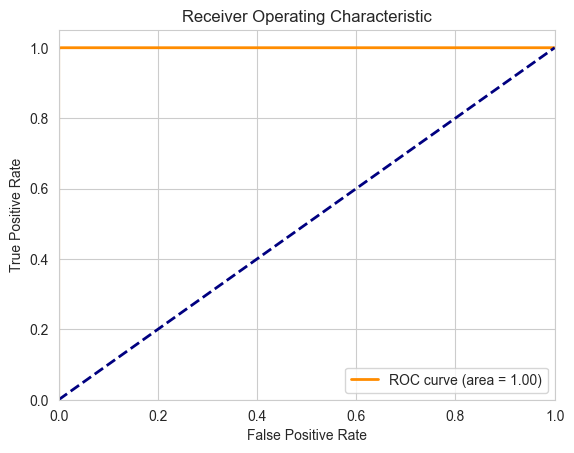

,Metric,Score
0,Train : Accuracy,0.999170
1,Train : F1 (macro),0.999495
2,Train : Roc Ouc,0.999997


In [359]:
Y_train_dtt_pred=dtmodel.predict(X_train)

accuracy_dtt=accuracy_score(y_train,Y_train_dtt_pred)
f1_dtt=f1_score(y_train,Y_train_dtt_pred)

y_probc = dtmodel.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probc)
roc_auc_dtc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dtc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

dtt = pd.DataFrame({
    "Metric": ["Train : Accuracy","Train : F1 (macro)","Train : Roc Ouc"],
    "Score": [accuracy_dtt,f1_dtt,roc_auc_dtc]})

dtt

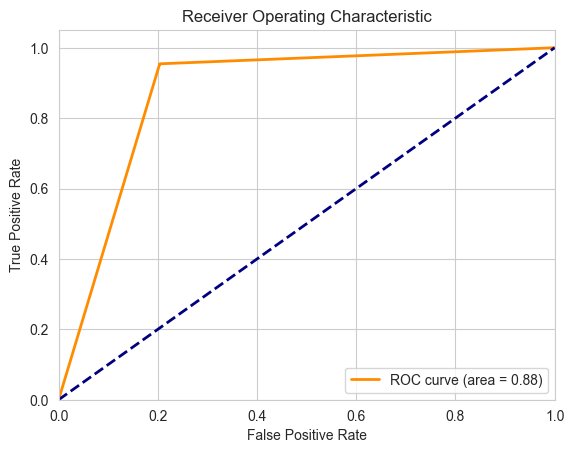

,Metric,Score
0,Test : Accuracy,0.925462
1,Test : F1 (macro),0.954571
2,Test : Roc Ouc,0.875264


In [360]:
Y_train_dt_pred=dtmodel.predict(X_test)

accuracy_dt=accuracy_score(y_test,Y_train_dt_pred)
f1_dt=f1_score(y_test,Y_train_dt_pred)

y_prob = dtmodel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_dt = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

dt = pd.DataFrame({
    "Metric": ["Test : Accuracy","Test : F1 (macro)","Test : Roc Ouc"],
    "Score": [accuracy_dt,f1_dt,roc_auc_dt]})

dt

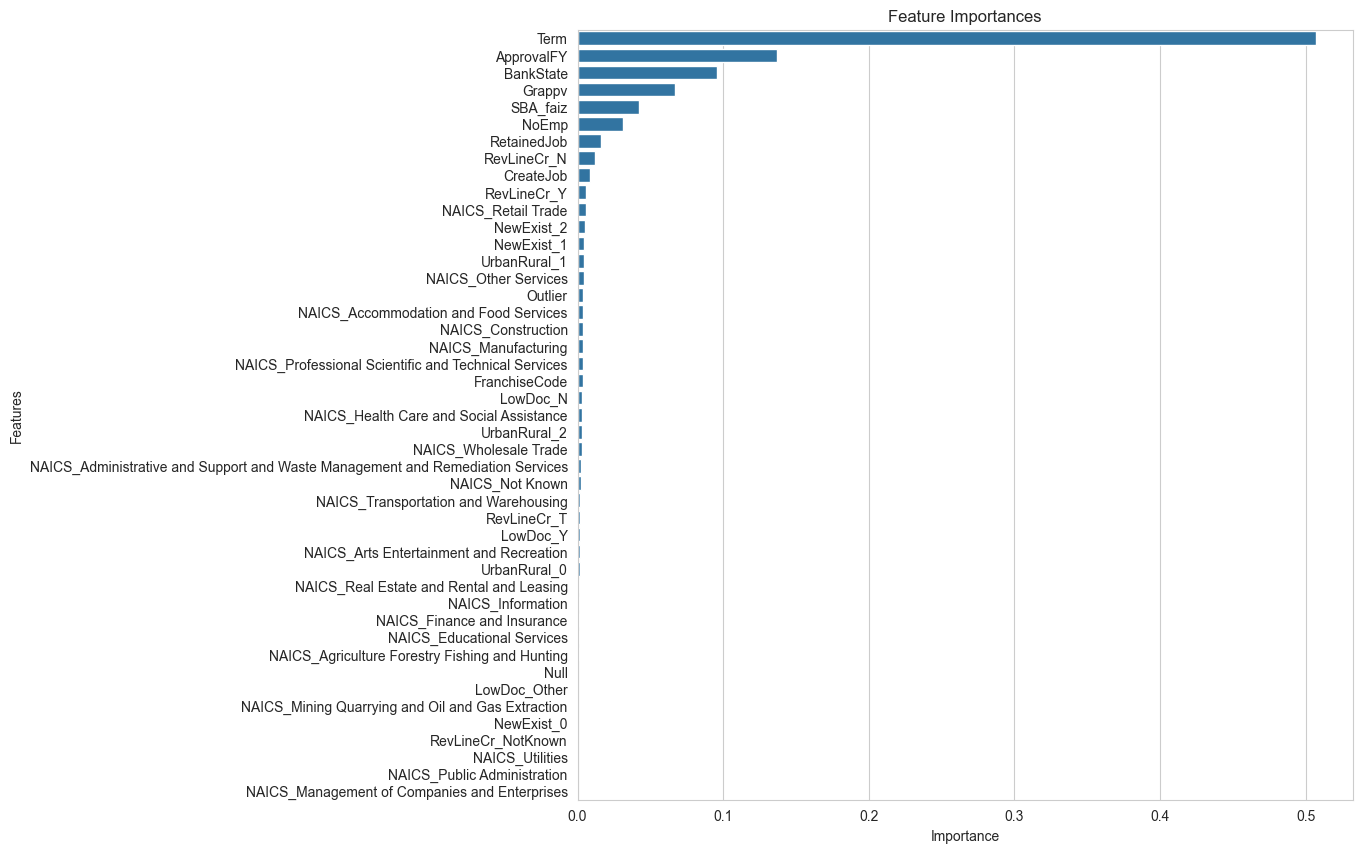

In [361]:
importances = dtmodel.feature_importances_

feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=["importance"])
feature_importances_sorted = feature_importances.sort_values(by="importance", ascending=False)

# Özellik önem sıralamasını görselleştirin
plt.figure(figsize=(10, 10))
sns.barplot(x="importance", y=feature_importances_sorted.index, data=feature_importances_sorted)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## LightGBM

In [362]:
lgb_model = lgb.LGBMClassifier(random_state=43)
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 583433, number of negative: 125899
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.293535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 744
[LightGBM] [Info] Number of data points in the train set: 709332, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.822510 -> initscore=1.533450
[LightGBM] [Info] Start training from score 1.533450


LGBMClassifier(random_state=43)

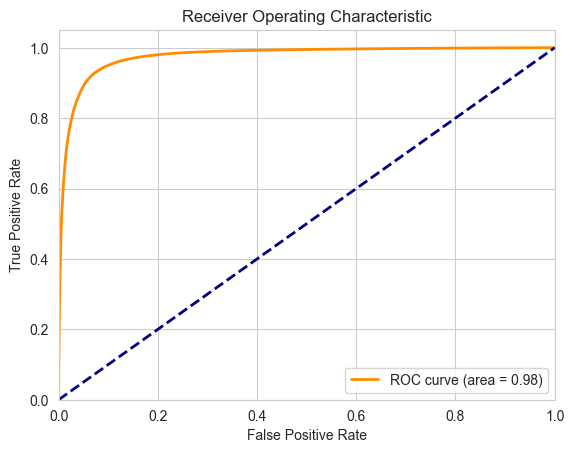

,Metric,Score
0,Train : Accuracy,0.949039
1,Train : F1 (macro),0.910311
2,Train : ROC OUC,0.975733


In [363]:
y_pred_lgb = lgb_model.predict(X_train)

accuracy_lgb = accuracy_score(y_train, y_pred_lgb)
f1_lgb = f1_score(y_train, y_pred_lgb, average='macro')

y_probbc = lgb_model .predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probbc)
roc_auc_lgb = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

LGB = pd.DataFrame({
    "Metric": ["Train : Accuracy","Train : F1 (macro)", "Train : ROC OUC"],
    "Score": [accuracy_lgb,f1_lgb,roc_auc_lgb]})

LGB

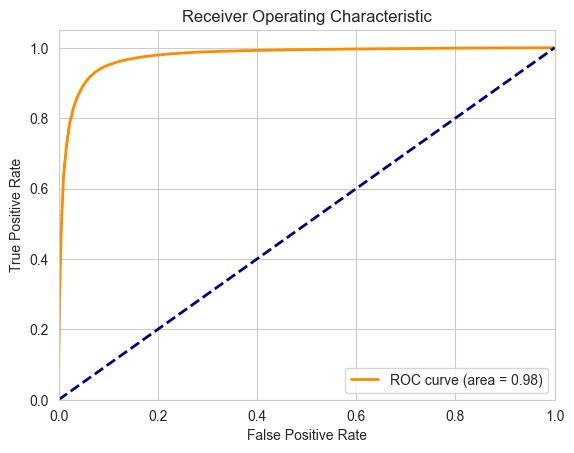

,Metric,Score
0,Test : Accuracy,0.948092
1,Test : F1 (macro),0.909285
2,Test : Roc Ouc,0.975805


In [364]:
y_pred_lgbm = lgb_model.predict(X_test)

accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='macro')

y_probb = lgb_model .predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probb)
roc_auc_lgbm = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

LGBM = pd.DataFrame({
    "Metric": ["Test : Accuracy","Test : F1 (macro)","Test : Roc Ouc"],
    "Score": [accuracy_lgbm,f1_lgbm,roc_auc_lgbm]})

LGBM

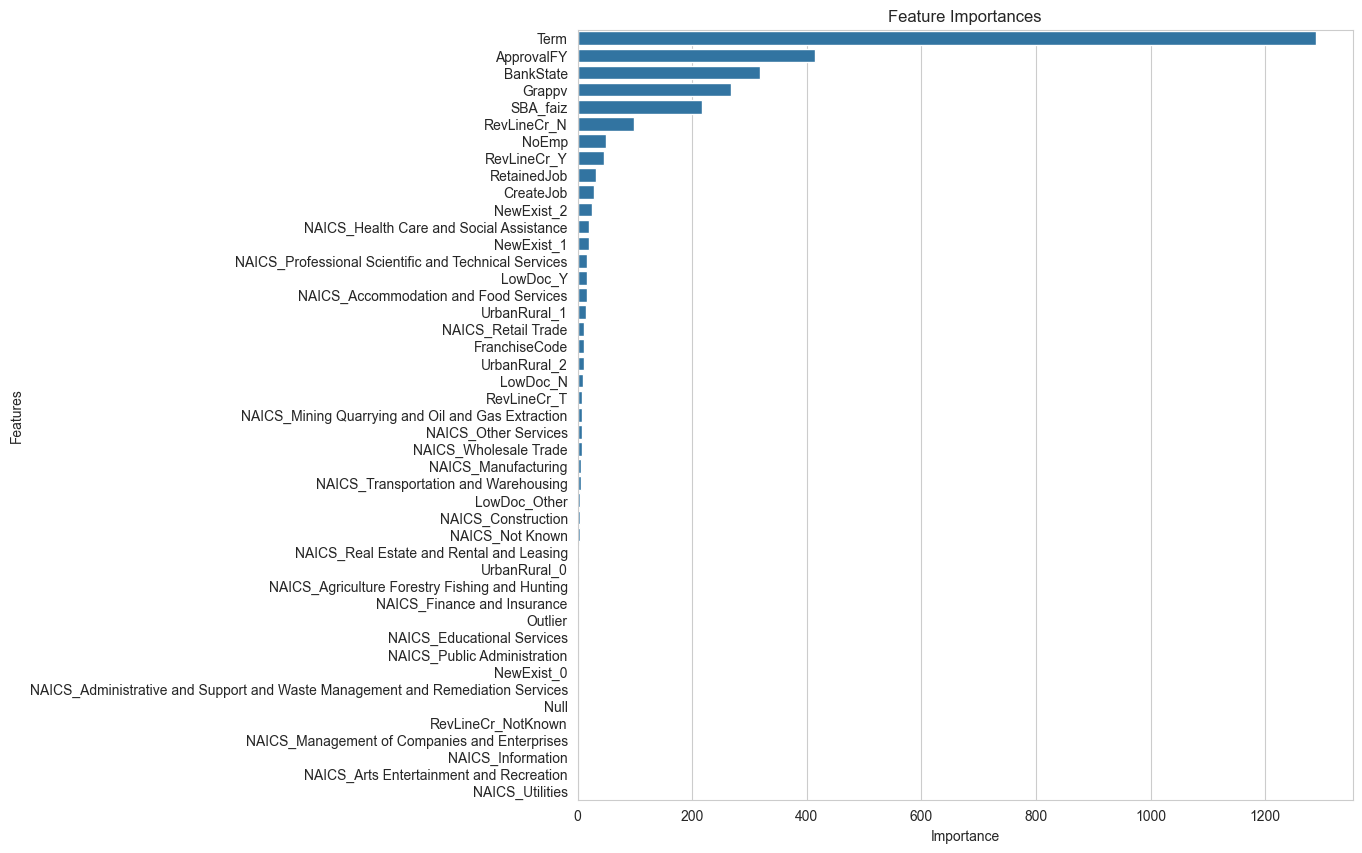

In [365]:
importancesss = lgb_model.feature_importances_

feature_importances = pd.DataFrame(importancesss, index=X_train.columns, columns=["importance"])

feature_importances_sorted = feature_importances.sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x="importance", y=feature_importances_sorted.index, data=feature_importances_sorted)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## XGBOOST

In [366]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

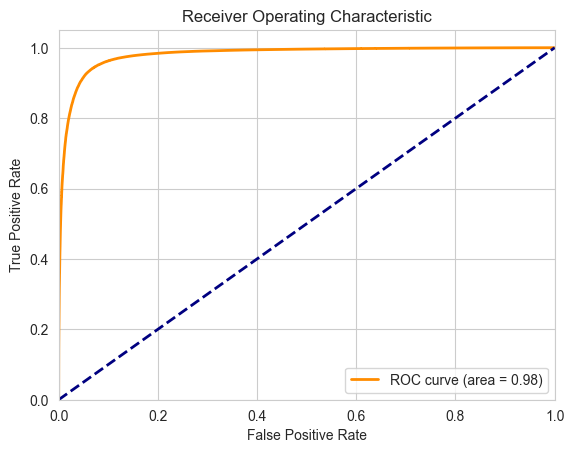

,Metric,Score
0,Train : Accuracy,0.954612
1,Train : F1 (macro),0.920798
2,Train : ROC OUC,0.980316


In [367]:
y_pred_xgb = xgb_model.predict(X_train)

accuracy_xgb = accuracy_score(y_train, y_pred_xgb)
f1_xgb = f1_score(y_train, y_pred_xgb, average='macro')

y_prob = xgb_model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc_xgb = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

XGB = pd.DataFrame({
    "Metric": ["Train : Accuracy","Train : F1 (macro)", "Train : ROC OUC"],
    "Score": [accuracy_xgb,f1_xgb,roc_auc_xgb]})

XGB

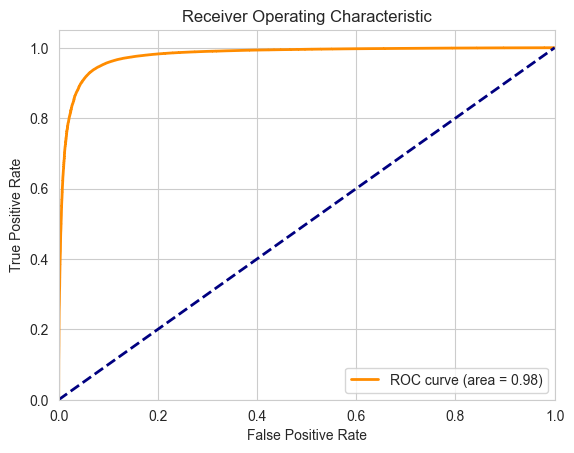

,Metric,Score
0,Test : Accuracy,0.952135
1,Test : F1 (macro),0.916965
2,Test : Roc Ouc,0.978685


In [368]:
y_pred_xgbt = xgb_model.predict(X_test)

accuracy_xgbt = accuracy_score(y_test, y_pred_xgbt)
f1_xgbt = f1_score(y_test, y_pred_xgbt, average='macro')

y_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_xgbt = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgbt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

XGBT = pd.DataFrame({
    "Metric": ["Test : Accuracy","Test : F1 (macro)","Test : Roc Ouc"],
    "Score": [accuracy_xgbt,f1_xgbt,roc_auc_xgbt]})

XGBT

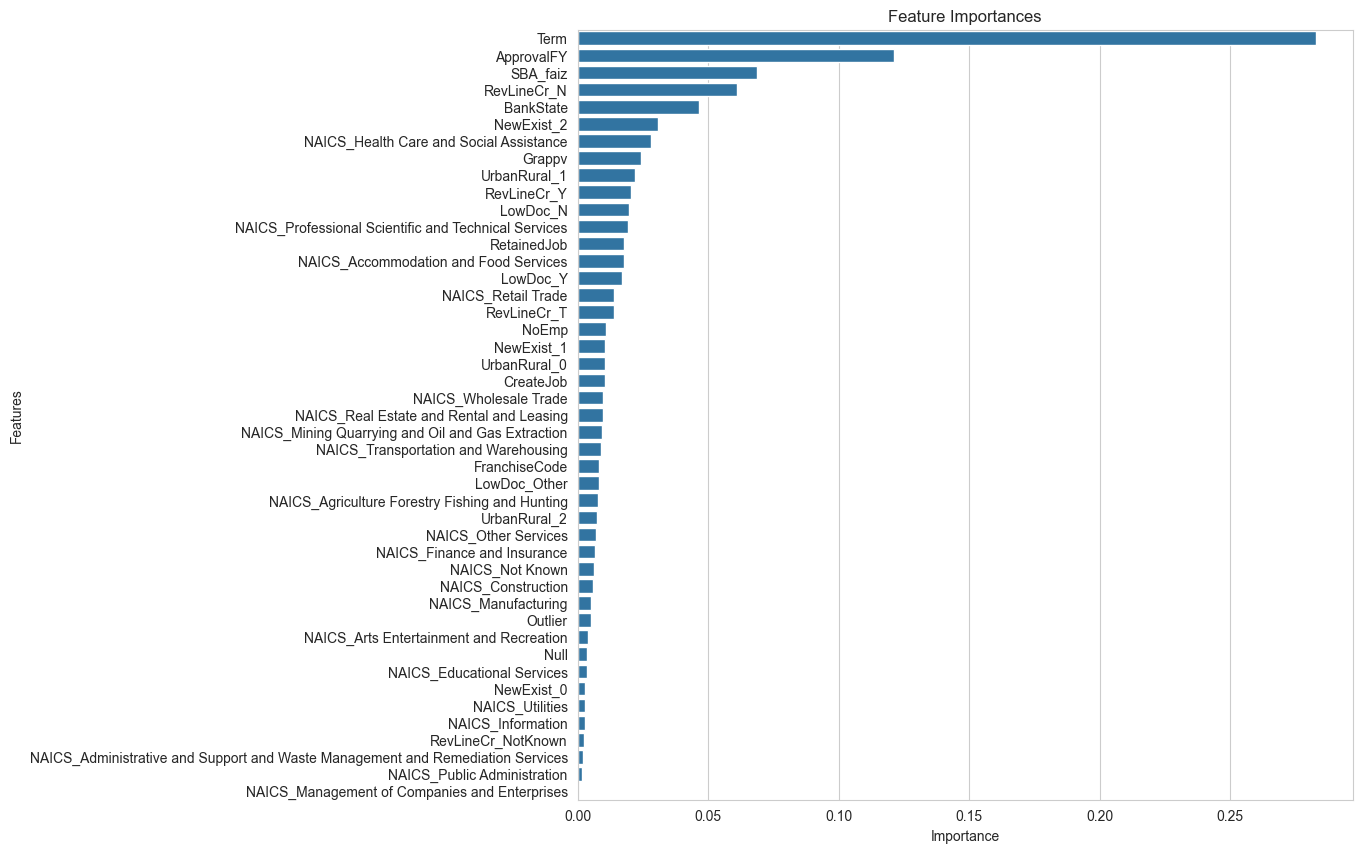

In [369]:
importancess = xgb_model.feature_importances_

feature_importances = pd.DataFrame(importancess, index=X_train.columns, columns=["importance"])

feature_importances_sorted = feature_importances.sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x="importance", y=feature_importances_sorted.index, data=feature_importances_sorted)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()